In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
# Loading clean data and countries metadata
data = pd.read_csv("final_df_without_nan.csv")
df_countries = pd.read_csv("countries_metadata.csv")

In [3]:
data = data[['Country Code', 'Country Name', 'Year', 'Control of Corruption: Estimate', 
             'Government Effectiveness: Estimate', 
             'Political Stability and Absence of Violence/Terrorism: Estimate', 
             'Regulatory Quality: Estimate', 'Rule of Law: Estimate', 'Voice and Accountability: Estimate',
             'Capture fisheries production (metric tons)', 'Forest area (% of land area)', 'CO2 emissions']]
df_countries.drop(["SpecialNotes", "TableName", "Unnamed: 5"], axis=1, inplace = True)

# Basic information

In [4]:
print("The dataset contains " + str(data.shape[0]) + " entries with "+ str(data.shape[1]) + " features each.")

The dataset contains 4222 entries with 12 features each.


In [5]:
# Missing values
data.isna().sum()

Country Code                                                         0
Country Name                                                         0
Year                                                                 0
Control of Corruption: Estimate                                      0
Government Effectiveness: Estimate                                   0
Political Stability and Absence of Violence/Terrorism: Estimate      0
Regulatory Quality: Estimate                                         0
Rule of Law: Estimate                                                0
Voice and Accountability: Estimate                                   0
Capture fisheries production (metric tons)                         650
Forest area (% of land area)                                       706
CO2 emissions                                                      705
dtype: int64

In [6]:
print("We are dealing with {} countries.".format(data["Country Code"].nunique()))

We are dealing with 203 countries.


In [7]:
print("We have information on {} different years.".format(data["Year"].nunique()))

We have information on 21 different years.


In [8]:
# Dropna to facilitate analysis
# data.dropna(inplace=True)

# Static Univariate analysis

In this part we will analyse the behavior of each variable individually, without its interaction with other variables.

We call it **"Static"**, as opposed to "Dynamic", because we will not look at the evolution of the variables over the years, but rather at the average value. 

In the **Dynamic approach**, we will rather look at the evolution of the variables (environmental and political) for each country.

## Environmental Variables

### CO2 

In [9]:
# Average per country
avg_co2 = data.groupby("Country Code").mean()["CO2 emissions"]

In [10]:
avg_co2.describe()

count       199.000
mean     148310.486
std      679530.903
min          10.215
25%        1823.518
50%        8106.311
75%       55077.525
max     7500366.726
Name: CO2 emissions, dtype: float64

**50% of the countries have less than 8,106 kt of CO2 emissions (averaged over the years for each country).**

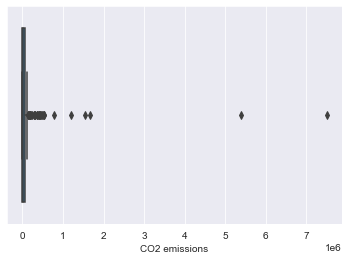

In [11]:
sns.boxplot(avg_co2);

**We have few countries with very high emissions and the majority with low emissions.**

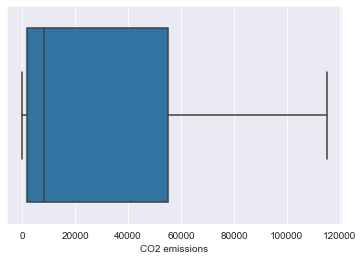

In [12]:
sns.boxplot(avg_co2, showfliers=False);

Which are the countries with the most CO2 emissions ? 

In [13]:
# Highest CO2 emission countries on AVG
avg_co2.sort_values(ascending=False)[:10]

Country Code
CHN   7500366.726
USA   5390892.846
RUS   1665958.786
IND   1554369.590
JPN   1199997.636
DEU    774942.046
CAN    538200.177
KOR    524676.630
IRN    509718.093
GBR    494813.572
Name: CO2 emissions, dtype: float64

Which are the countries with the least CO2 emissions ?

In [14]:
# Lowest CO2 emission country on AVG
avg_co2.sort_values(ascending=True)[:10]

Country Code
TUV    10.215
NRU    44.004
LIE    56.472
KIR    57.100
STP    85.563
VUT   101.166
TON   117.082
FSM   129.917
MHL   130.178
COM   134.864
Name: CO2 emissions, dtype: float64

### Forest Area

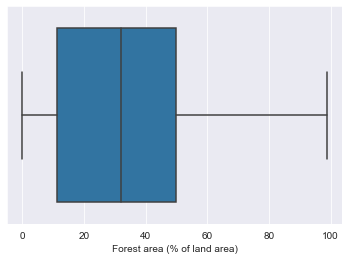

In [15]:
sns.boxplot(data["Forest area (% of land area)"]);

**The mean foest area is 32% of the total land area, and 50% of countries have forest areas between 11% and 49%.**

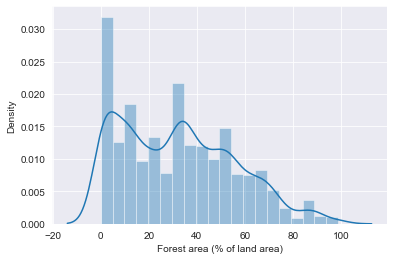

In [16]:
sns.distplot(data['Forest area (% of land area)']);

### Fishing

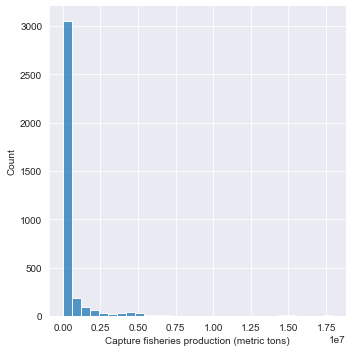

In [17]:
sns.displot(data=data, x='Capture fisheries production (metric tons)', bins=30)

<AxesSubplot:xlabel='Capture fisheries production (metric tons)'>

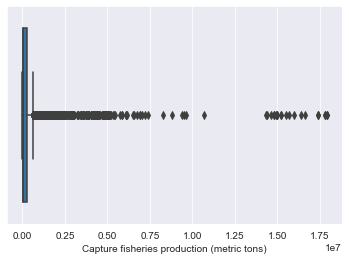

In [18]:
sns.boxplot(x = data['Capture fisheries production (metric tons)'])

**The vast majority of contries have a very low production of fish, which explains the many outliers on the boxplot.**

## Governance indicators

### Overview

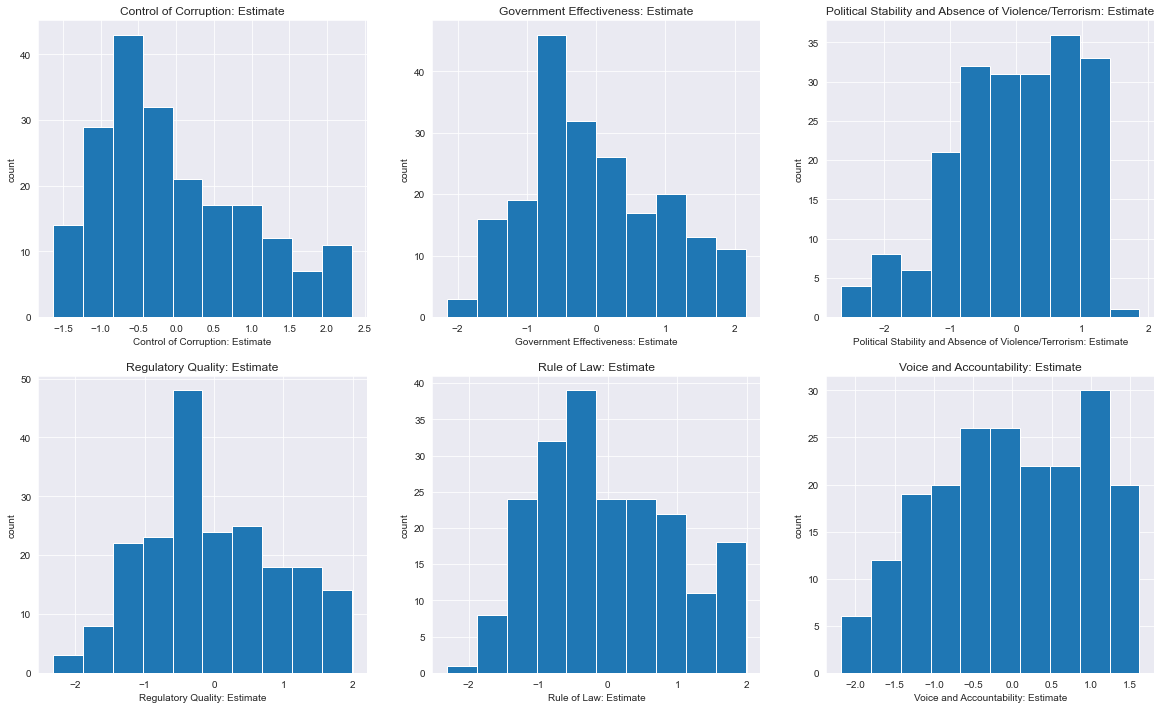

In [19]:
# Loop for histograms
vars = ['Control of Corruption: Estimate', 'Government Effectiveness: Estimate',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Regulatory Quality: Estimate', 'Rule of Law: Estimate',
       'Voice and Accountability: Estimate']

fig, ax = plt.subplots(2,3, figsize=(20,12))
for i, var in enumerate(vars):
  row = i//3
  col = i%3
  ax[row, col].hist(data.groupby("Country Code").mean()[var])
  ax[row, col].set_title(var)
  ax[row, col].set_xlabel(var)
  ax[row, col].set_ylabel("count")

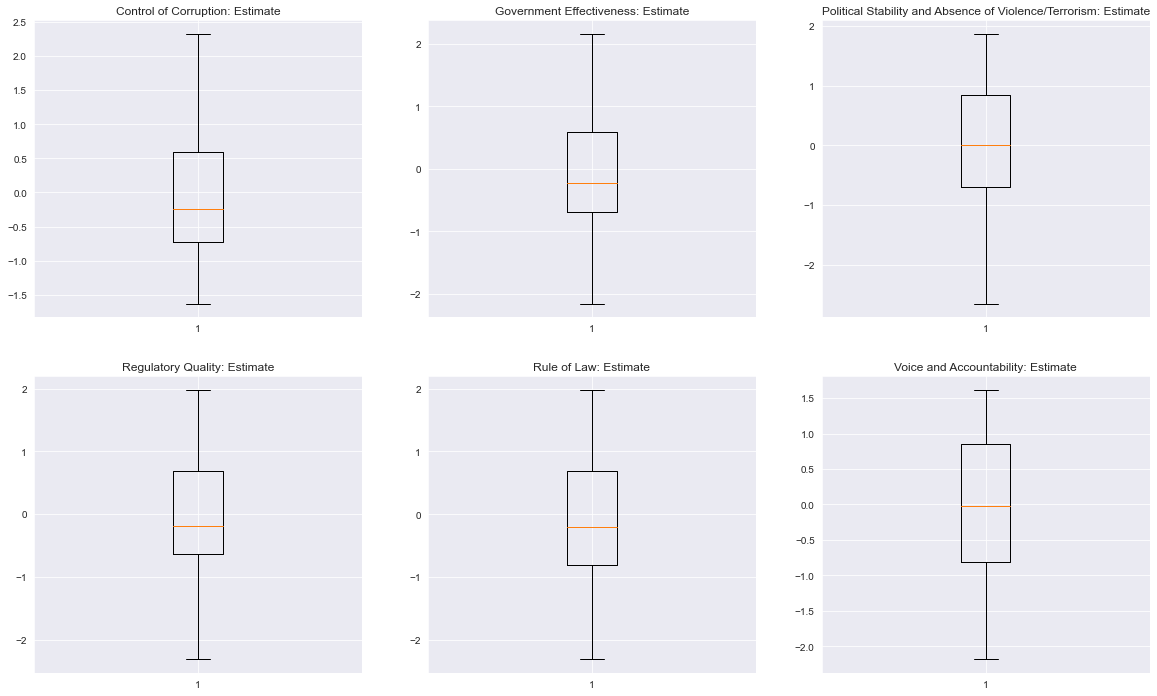

In [20]:
# Loop for boxplots
vars = ['Control of Corruption: Estimate', 'Government Effectiveness: Estimate',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Regulatory Quality: Estimate', 'Rule of Law: Estimate',
       'Voice and Accountability: Estimate']

fig, ax = plt.subplots(2,3, figsize=(20,12))
for i, var in enumerate(vars):
  row = i//3
  col = i%3
  ax[row, col].boxplot(data.groupby("Country Code").mean()[var])
  ax[row, col].set_title(var)

**There doesn't seem to be many outliers for governance indicators. Political stability appears to be skewed to the left which might indicate that more countries are polytically stable generally speaking.**

## Dimensionality reduction using PCA

In [21]:
from sklearn.decomposition import PCA
df_pca = data.drop(["Country Name", "Year", 'Capture fisheries production (metric tons)', 'Forest area (% of land area)', 'CO2 emissions'], axis=1)
df_pca = df_pca.groupby("Country Code").mean()
df_pca.dropna(inplace=True)
index = df_pca.index
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_pca)

In [22]:
print('Explained variation by principal component 1: {}'.format(pca.explained_variance_ratio_[0]))

Explained variation by principal component 1: 0.8667045982586209


In [23]:
print('Explained variation by principal component 2: {}'.format(pca.explained_variance_ratio_[1]))

Explained variation by principal component 2: 0.06180012309177191


In [24]:
print('The 1st principal component for the political indicators is : {}'.format(pca.components_[0]))
print('The 2nd principal component for the political indicators is : {}'.format(pca.components_[1]))

The 1st principal component for the political indicators is : [-0.42487826 -0.42305993 -0.35840434 -0.41415483 -0.43536935 -0.38855425]
The 2nd principal component for the political indicators is : [-0.12749172 -0.35505272  0.76775388 -0.41243727 -0.04670747  0.3097601 ]


**We see that the first principal component in the Principal Components Analysis explains more than 86% of the variability and is a linear combination of all governance indicators with almost the same coefficient every time, which is due to the high correlation between these political variables as we will see in the bivariate analysis.**

Text(0.5, 1.0, 'Spread of countries according to the two first principal components in the PCA analysis.')

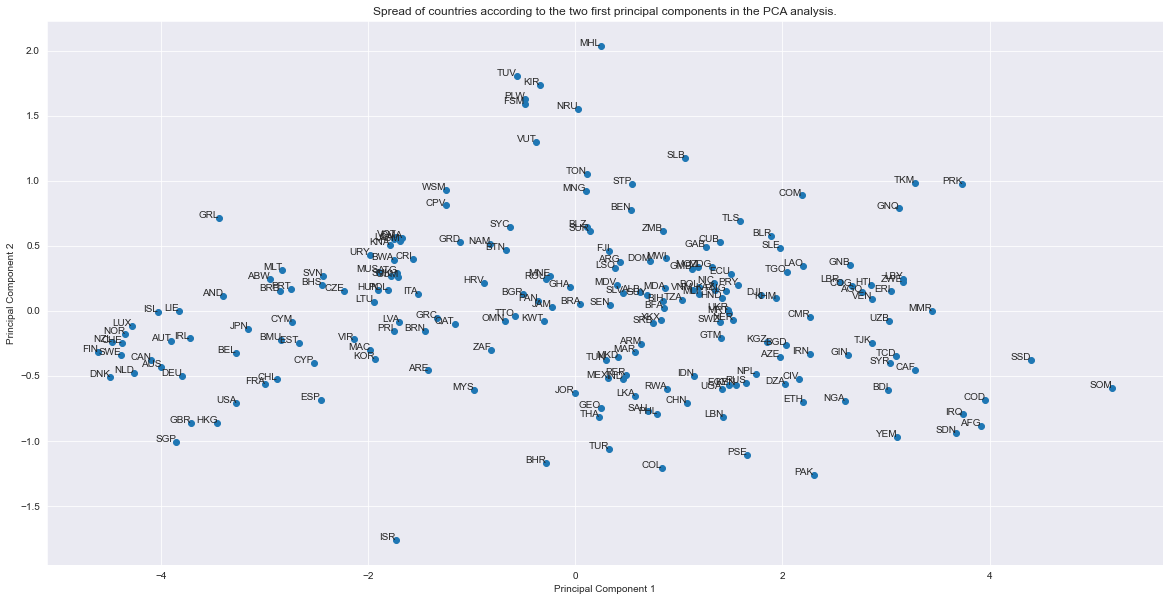

In [25]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(principalComponents[:,0], principalComponents[:,1])
for i, txt in enumerate(index):
    ax.annotate(txt, 
                (principalComponents[i,0],principalComponents[i,1]), 
                size=10, 
                xytext=(0,0), 
                ha='right', 
                textcoords='offset points')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Spread of countries according to the two first principal components in the PCA analysis.")

# Static Bivariate Analysis

In this part, we will try to answer the following questions:
- Does high Corruption equals high (or low) depletion of natural ressources ? 
- More generally, what is the link between the governance indicators and the environmental ones ? 

Again, we will look at them in a **STATIC** way, meaning that we will ONLY look at the average value for each country of each variable and see if they correlate in any way.

## Overall Correlation Analysis

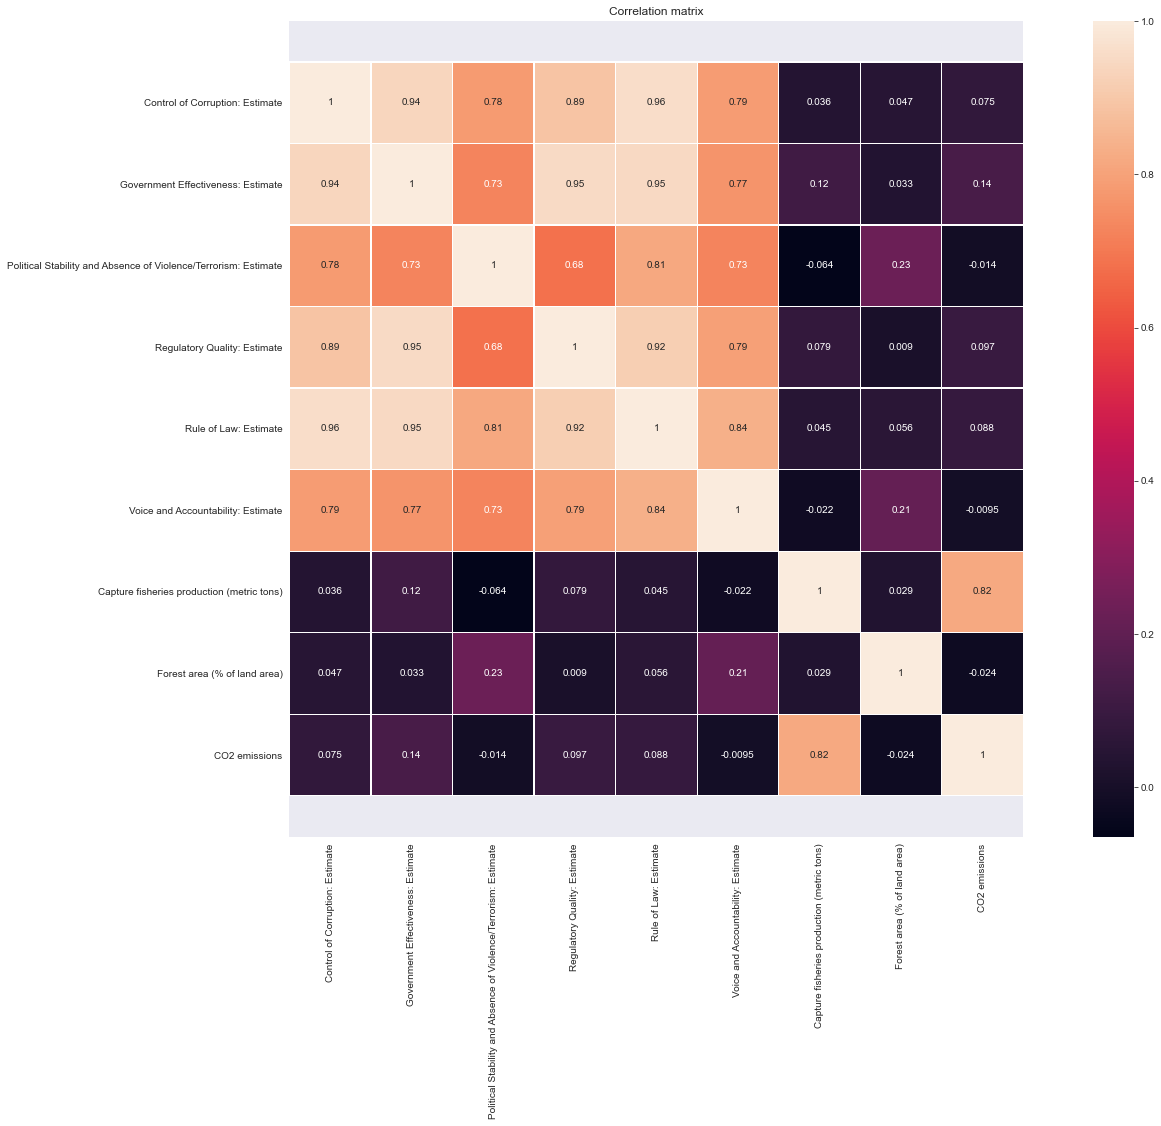

In [26]:
# Display the correlation matrix between the variables 
base_correlation = data.drop(['Year'], axis=1)
corrMatrix = base_correlation.groupby("Country Code").mean().corr()
plt.figure(figsize = (25,15))
sns.heatmap(corrMatrix, annot=True, square=True, linewidths=.3)

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Correlation matrix")
plt.show()

We can notice several things:

- Political factors are highly correlated between one another 
- Environmental factors are not very correlated with the politcal factors, meaning : high political stability doesn't necessarily equal high (or low) impact on the depletion of natural ressources. 

Now we will look at each individual interaction between a governance indicator and an environmental variable.

## Control of Corruption

### CO2

Text(0, 0.5, 'CO2 Emission')

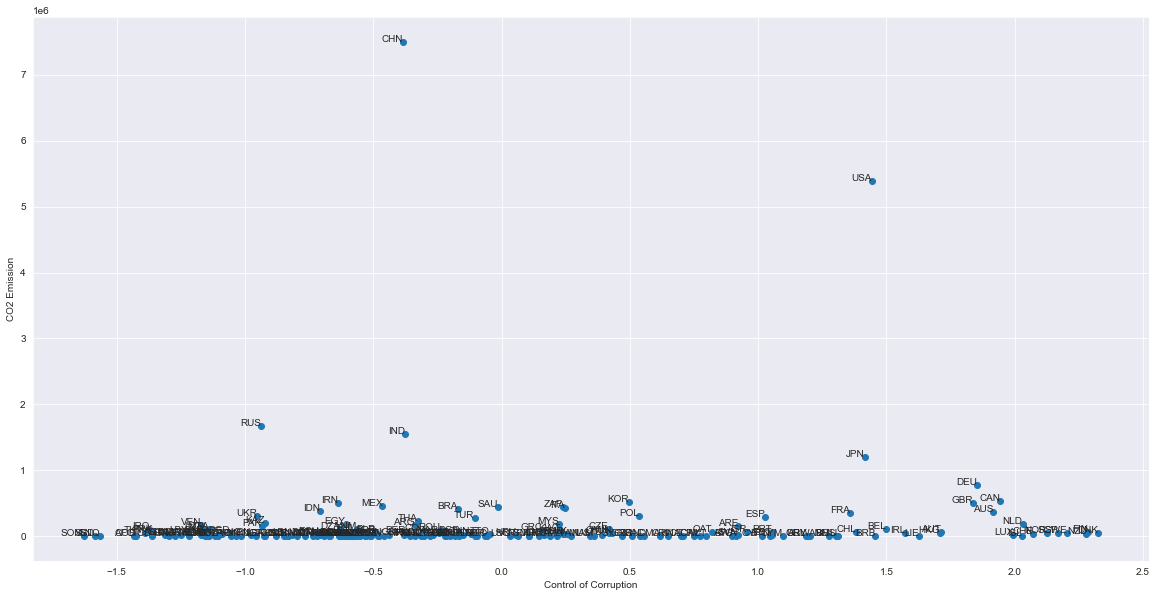

In [27]:
# Plot
avg_co2 = data.groupby("Country Code").mean()["CO2 emissions"]
avg_corruption = data.groupby("Country Code").mean()["Control of Corruption: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_corruption, avg_co2)
for i, txt in enumerate(avg_co2.index):
    ax.annotate(txt, (avg_corruption[i],avg_co2[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Control of Corruption")
ax.set_ylabel("CO2 Emission")

We observe that outliers like China and the USA prevents us from looking at other countries. We decided to remove these outliers and show the graph again.

Text(0, 0.5, 'CO2 Emission')

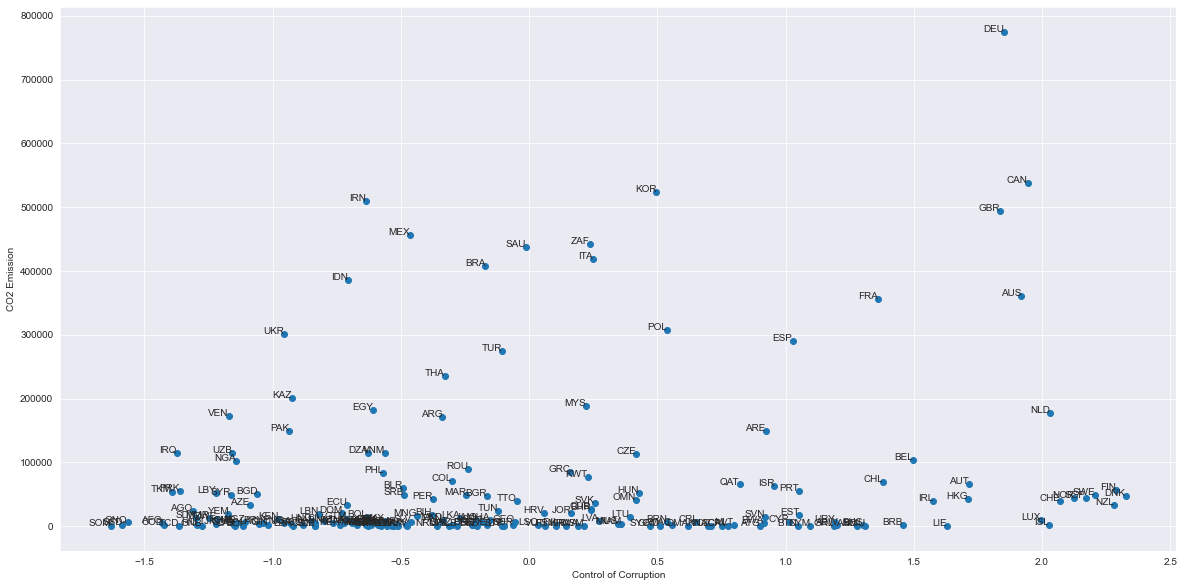

In [28]:
# Remove outliers
mask = ~data["Country Code"].isin(["CHN", "USA", "RUS", "IND", "JPN"])
avg_co2 = data[mask].groupby("Country Code").mean()["CO2 emissions"]
avg_corruption = data[mask].groupby("Country Code").mean()["Control of Corruption: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_corruption, avg_co2)
for i, txt in enumerate(avg_co2.index):
    ax.annotate(txt, (avg_corruption[i],avg_co2[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Control of Corruption")
ax.set_ylabel("CO2 Emission")

We observe that Scandinavian countries have a low level of corruption and low Co2 emissions as well, whereas countries like India, Iran and Mexico are on the other end of the spectrum.

### Forest

Text(0, 0.5, 'Forest land %')

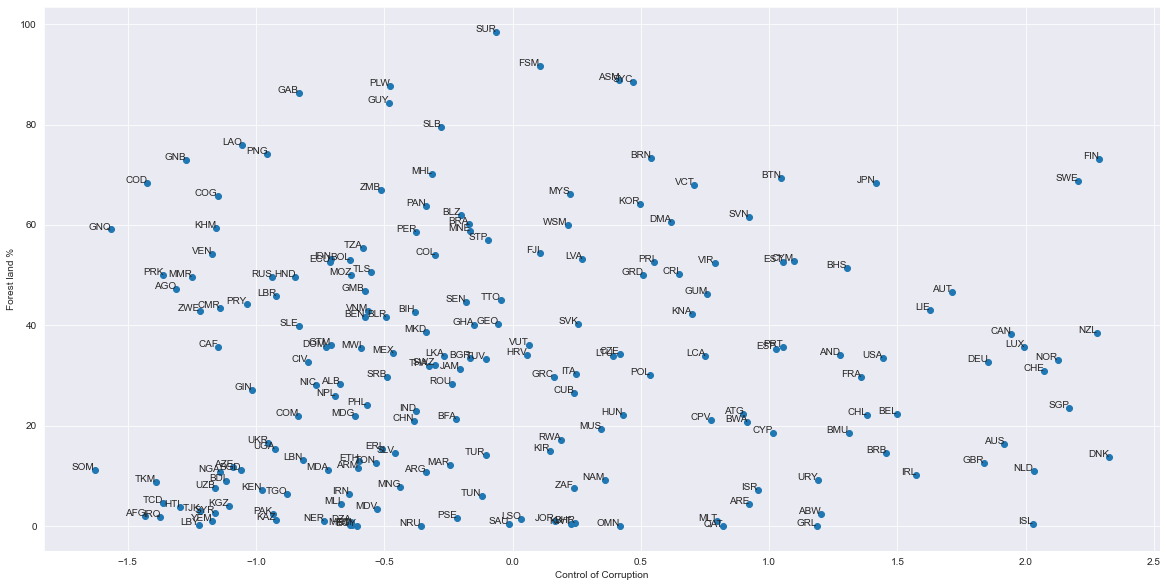

In [29]:
# Plot
avg_forest = data.groupby("Country Code").mean()["Forest area (% of land area)"]
avg_corruption = data.groupby("Country Code").mean()["Control of Corruption: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_corruption, avg_forest)
for i, txt in enumerate(avg_forest.index):
    ax.annotate(txt, (avg_corruption[i],avg_forest[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Control of Corruption")
ax.set_ylabel("Forest land %")

### Fishing

Text(0, 0.5, 'Fishing quantity')

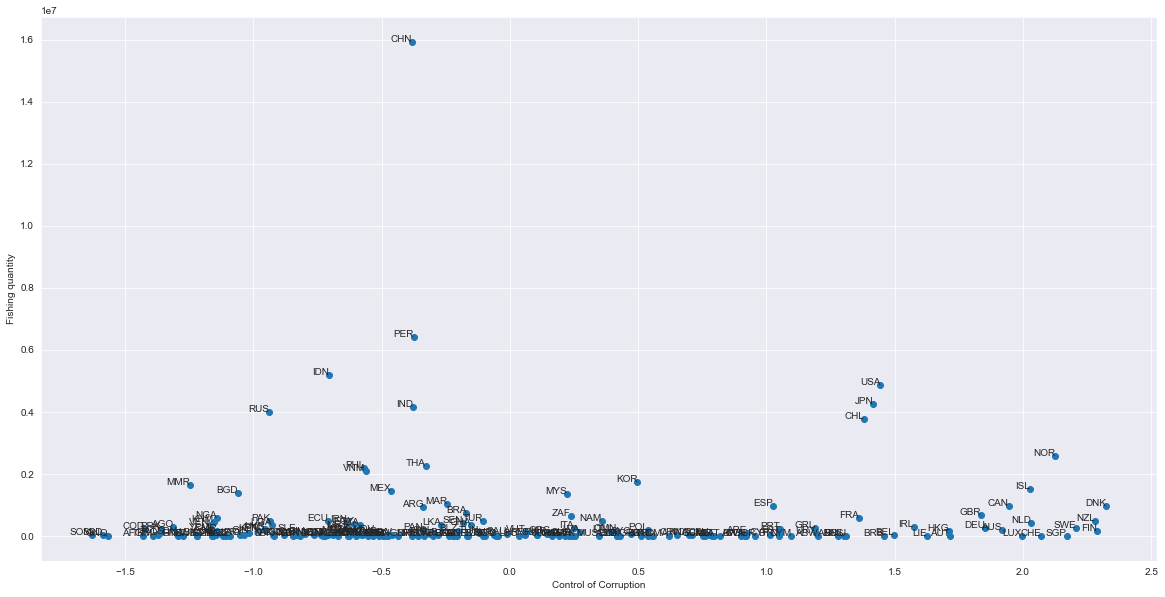

In [30]:
# Plot
avg_fishing = data.groupby("Country Code").mean()["Capture fisheries production (metric tons)"]
avg_corruption = data.groupby("Country Code").mean()["Control of Corruption: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_corruption, avg_fishing)
for i, txt in enumerate(avg_fishing.index):
    ax.annotate(txt, (avg_corruption[i],avg_fishing[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Control of Corruption")
ax.set_ylabel("Fishing quantity")

## Government effectiveness

### CO2

Text(0, 0.5, 'CO2 Emission')

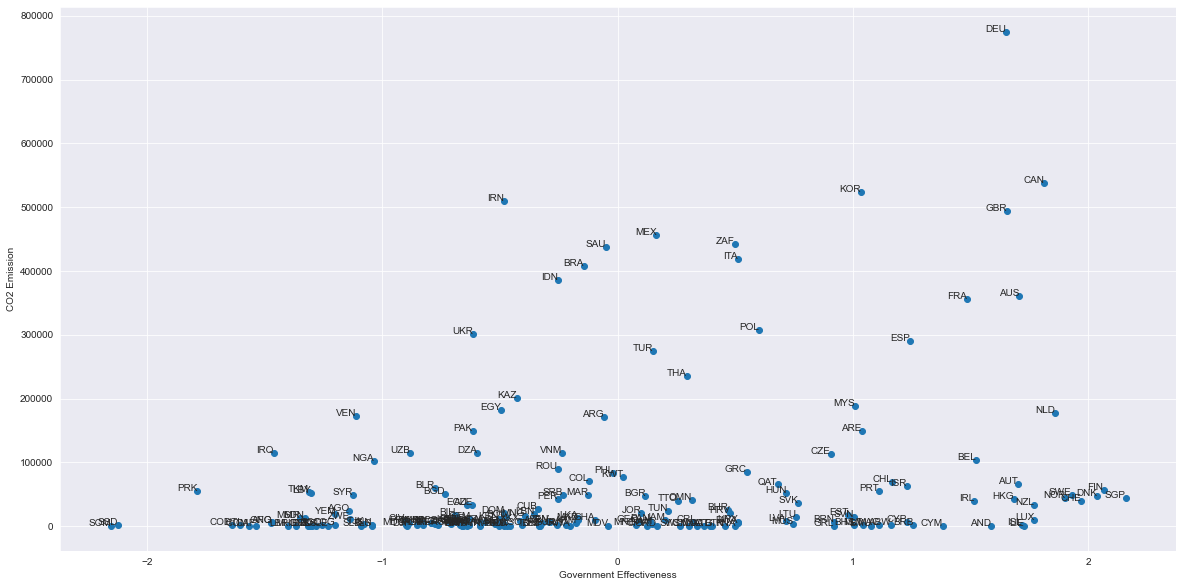

In [31]:
# Plot without outliers
avg_co2 = data[mask].groupby("Country Code").mean()["CO2 emissions"]
avg_gov_effect = data[mask].groupby("Country Code").mean()["Government Effectiveness: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_gov_effect, avg_co2)
for i, txt in enumerate(avg_co2.index):
    ax.annotate(txt, (avg_gov_effect[i],avg_co2[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Government Effectiveness")
ax.set_ylabel("CO2 Emission")

### Forest

Text(0, 0.5, 'Forest land %')

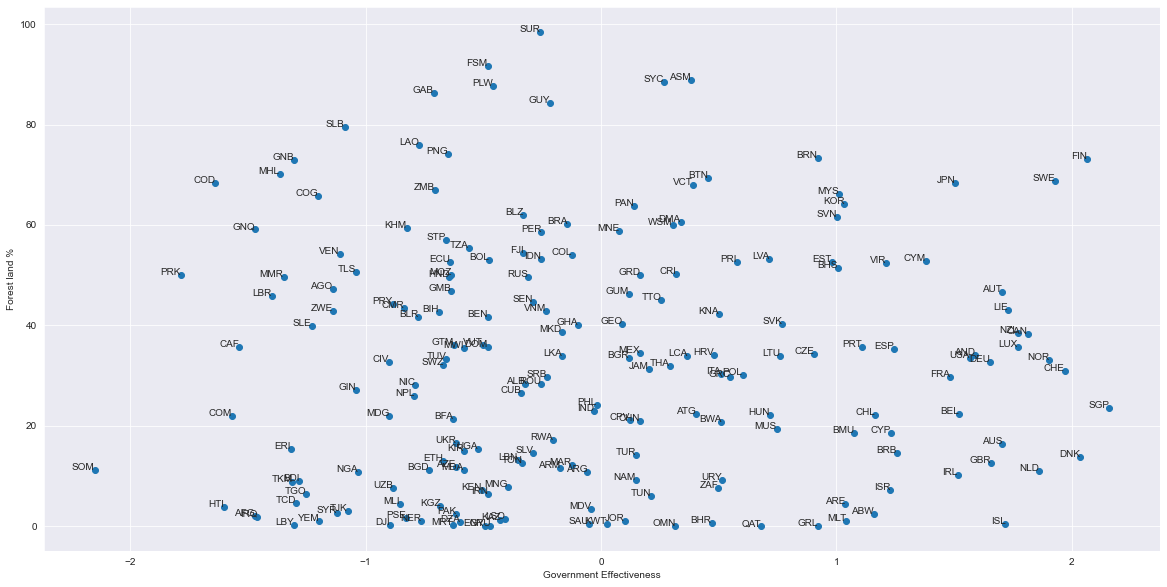

In [32]:
# Plot
avg_forest = data.groupby("Country Code").mean()["Forest area (% of land area)"]
avg_gov_effect = data.groupby("Country Code").mean()["Government Effectiveness: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_gov_effect, avg_forest)
for i, txt in enumerate(avg_forest.index):
    ax.annotate(txt, (avg_gov_effect[i],avg_forest[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Government Effectiveness")
ax.set_ylabel("Forest land %")

### Fishing

Text(0, 0.5, 'Fishing quantity')

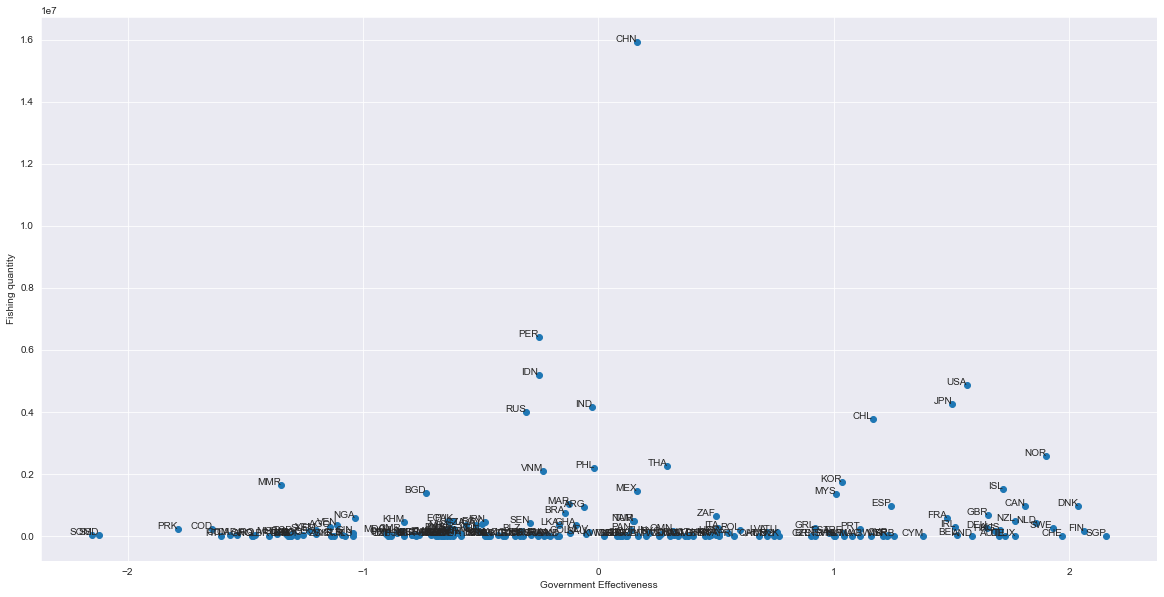

In [33]:
avg_gov_effect = data.groupby("Country Code").mean()["Government Effectiveness: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_gov_effect, avg_fishing)
for i, txt in enumerate(avg_fishing.index):
    ax.annotate(txt, (avg_gov_effect[i],avg_fishing[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Government Effectiveness")
ax.set_ylabel("Fishing quantity")

## Political stability

### CO2

Text(0, 0.5, 'CO2 Emission')

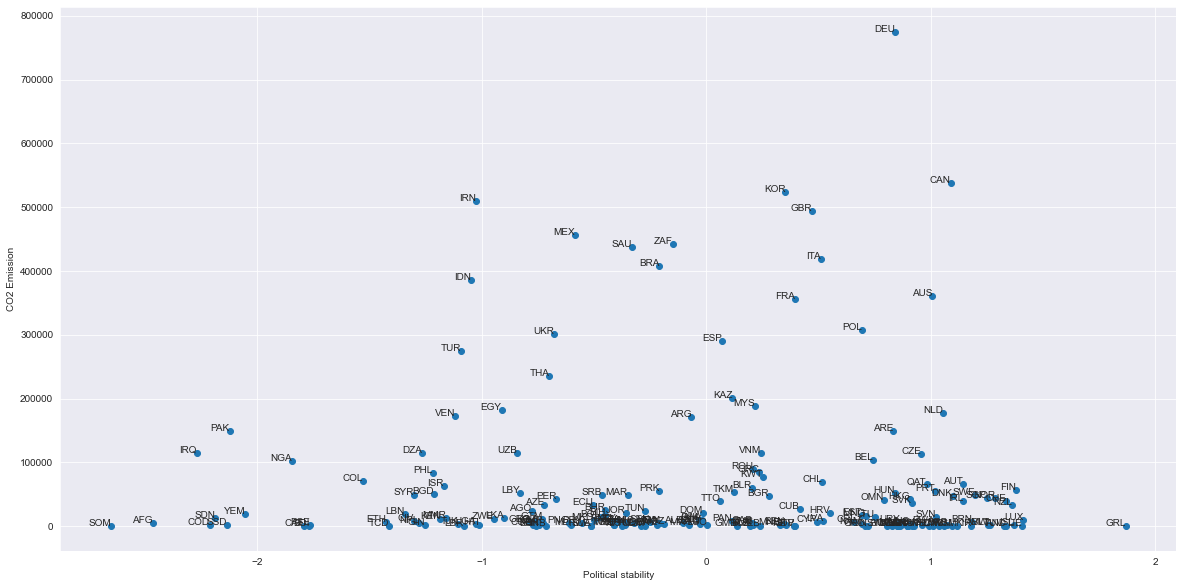

In [34]:
# Plot without outliers
avg_co2 = data[mask].groupby("Country Code").mean()["CO2 emissions"]
avg_political_stab = data[mask].groupby("Country Code").mean()["Political Stability and Absence of Violence/Terrorism: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_political_stab, avg_co2)
for i, txt in enumerate(avg_co2.index):
    ax.annotate(txt, (avg_political_stab[i],avg_co2[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Political stability")
ax.set_ylabel("CO2 Emission")

### Forest

Text(0, 0.5, 'Forest land %')

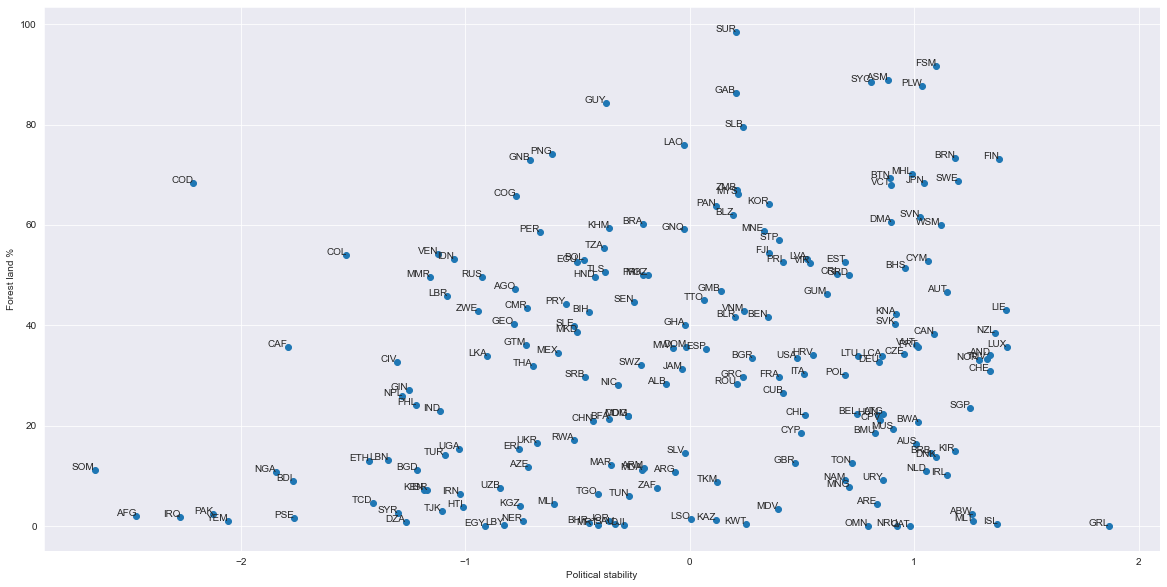

In [35]:
# Plot
avg_forest = data.groupby("Country Code").mean()["Forest area (% of land area)"]
avg_political_stab = data.groupby("Country Code").mean()["Political Stability and Absence of Violence/Terrorism: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_political_stab, avg_forest)
for i, txt in enumerate(avg_forest.index):
    ax.annotate(txt, (avg_political_stab[i],avg_forest[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Political stability")
ax.set_ylabel("Forest land %")

### Fishing

Text(0, 0.5, 'Fishing quantity')

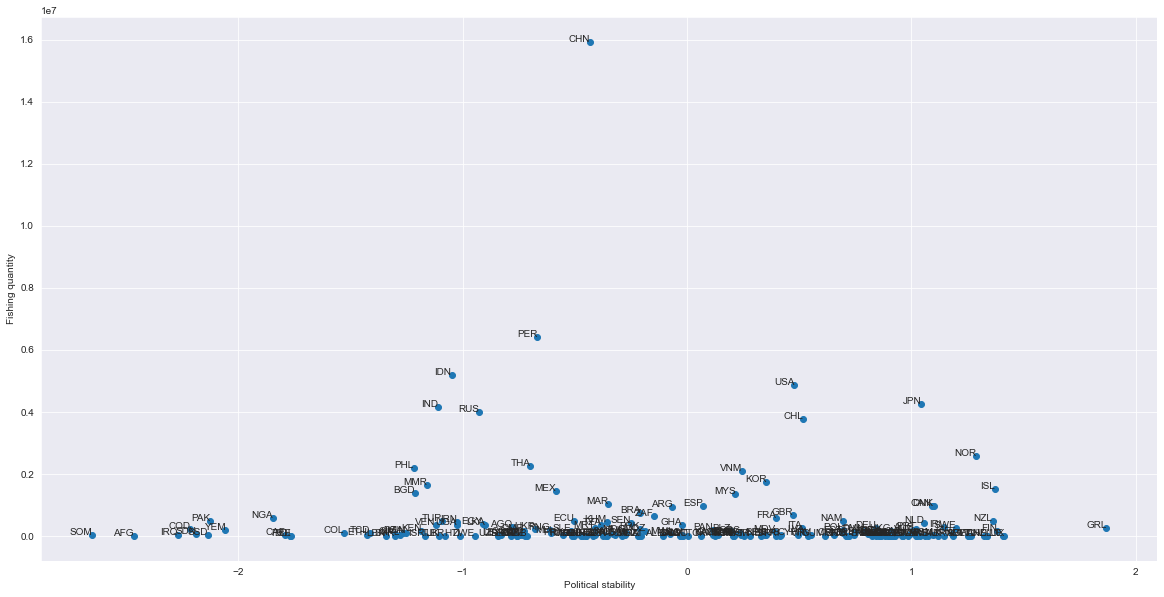

In [36]:
# Plot
avg_political_stab = data.groupby("Country Code").mean()["Political Stability and Absence of Violence/Terrorism: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_political_stab, avg_fishing)
for i, txt in enumerate(avg_fishing.index):
    ax.annotate(txt, (avg_political_stab[i],avg_fishing[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Political stability")
ax.set_ylabel("Fishing quantity")

## Regulatory quality

### CO2

Text(0, 0.5, 'CO2 Emission')

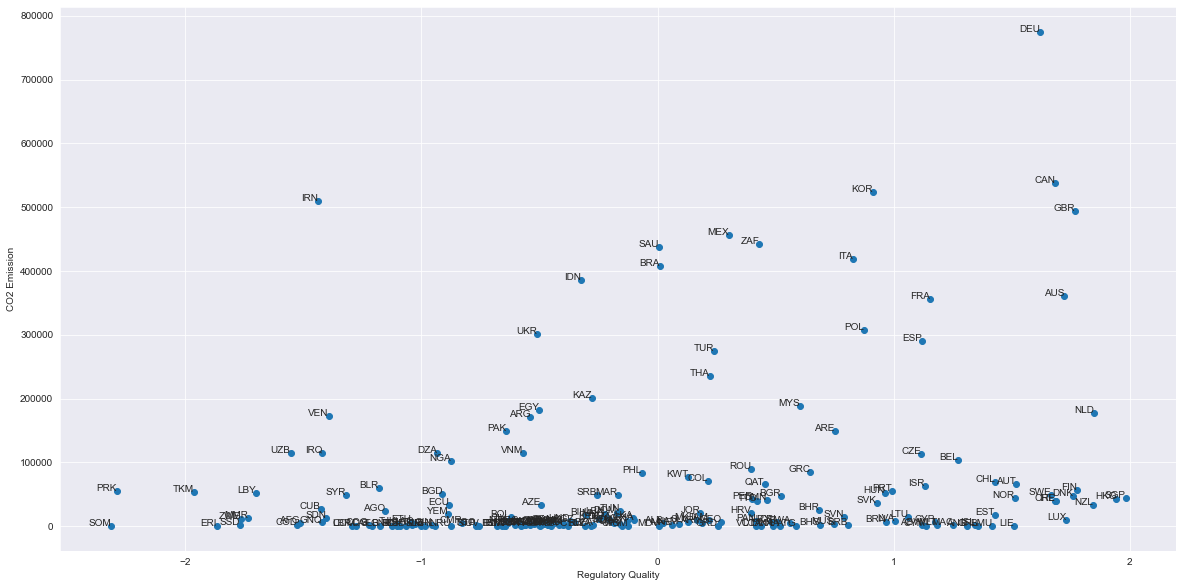

In [37]:
# Plot without outliers
avg_co2 = data[mask].groupby("Country Code").mean()["CO2 emissions"]
avg_reg_qual = data[mask].groupby("Country Code").mean()["Regulatory Quality: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_reg_qual, avg_co2)
for i, txt in enumerate(avg_co2.index):
    ax.annotate(txt, (avg_reg_qual[i],avg_co2[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Regulatory Quality")
ax.set_ylabel("CO2 Emission")

### Forest

Text(0, 0.5, 'Forest land %')

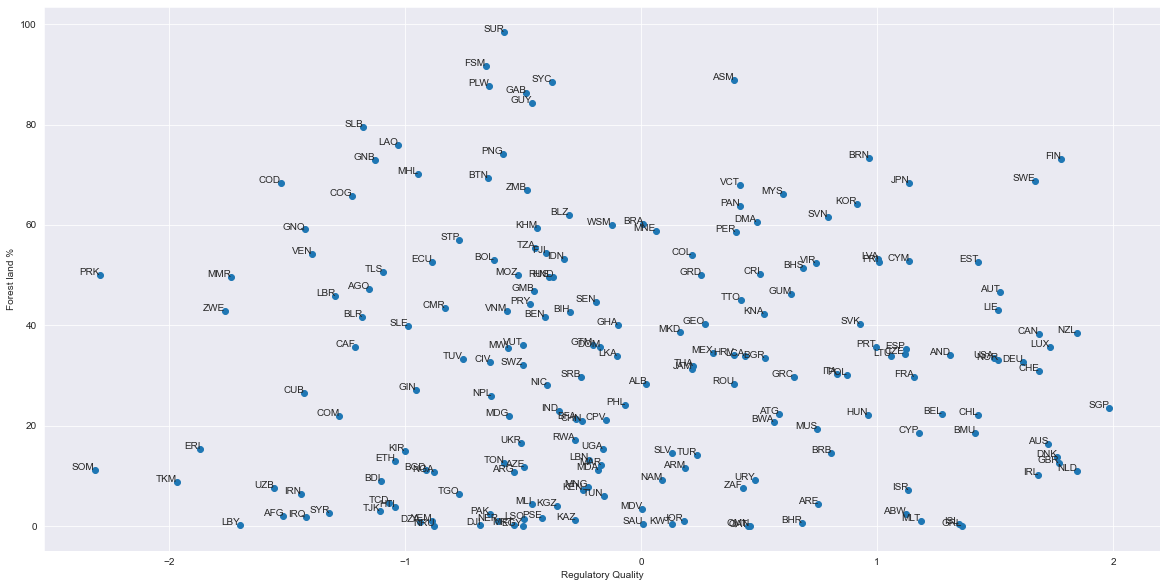

In [38]:
avg_reg_qual = data.groupby("Country Code").mean()["Regulatory Quality: Estimate"]
join = pd.concat([avg_reg_qual, avg_forest], axis=1).dropna()
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(join.iloc[:,0], join.iloc[:,1])
for i, txt in enumerate(join.iloc[:,0].index):
    ax.annotate(txt, (join.iloc[:,0][i],join.iloc[:,1][i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Regulatory Quality")
ax.set_ylabel("Forest land %")

### Fishing

Text(0, 0.5, 'Fishing quantity')

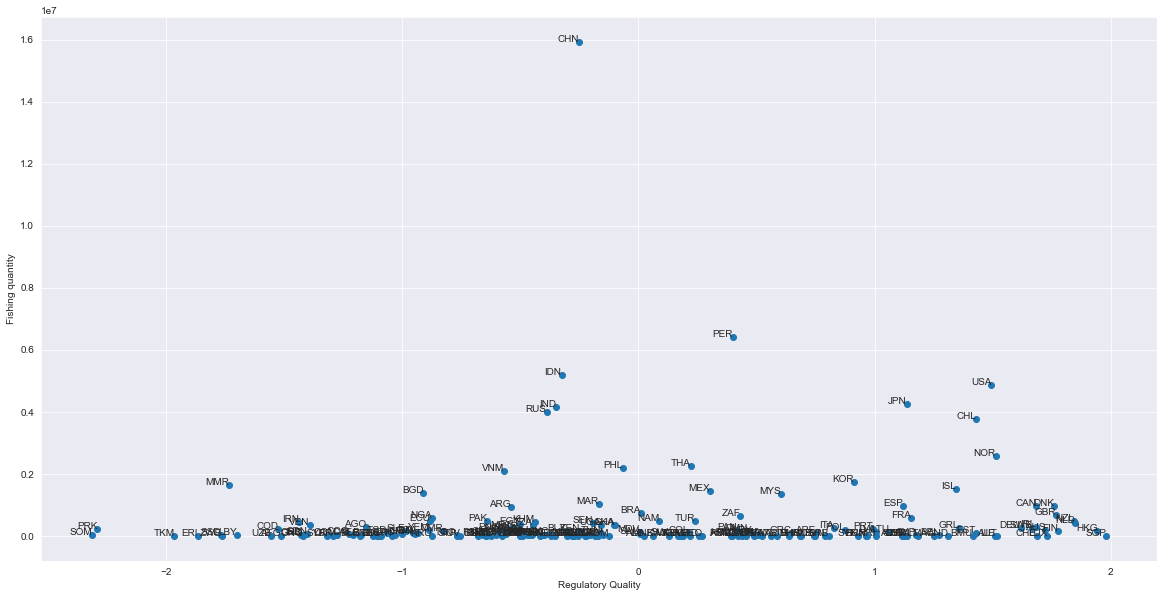

In [39]:
join = pd.concat([avg_reg_qual, avg_fishing], axis=1).dropna()
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(join.iloc[:,0], join.iloc[:,1])
for i, txt in enumerate(join.iloc[:,0].index):
    ax.annotate(txt, (join.iloc[:,0][i],join.iloc[:,1][i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Regulatory Quality")
ax.set_ylabel("Fishing quantity")

## Rule of Law

### CO2

Text(0, 0.5, 'CO2 Emission')

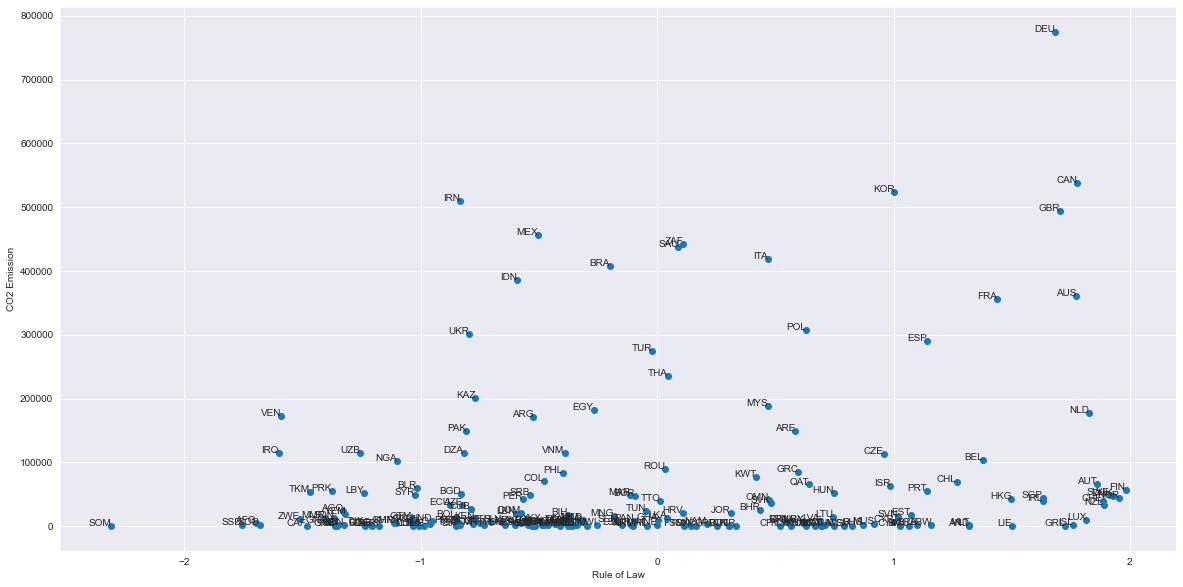

In [40]:
# Plot without outliers
avg_co2 = data[mask].groupby("Country Code").mean()["CO2 emissions"]
avg_rol = data[mask].groupby("Country Code").mean()["Rule of Law: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_rol, avg_co2)
for i, txt in enumerate(avg_co2.index):
    ax.annotate(txt, (avg_rol[i],avg_co2[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Rule of Law")
ax.set_ylabel("CO2 Emission")

### Forest

Text(0, 0.5, 'Forest land %')

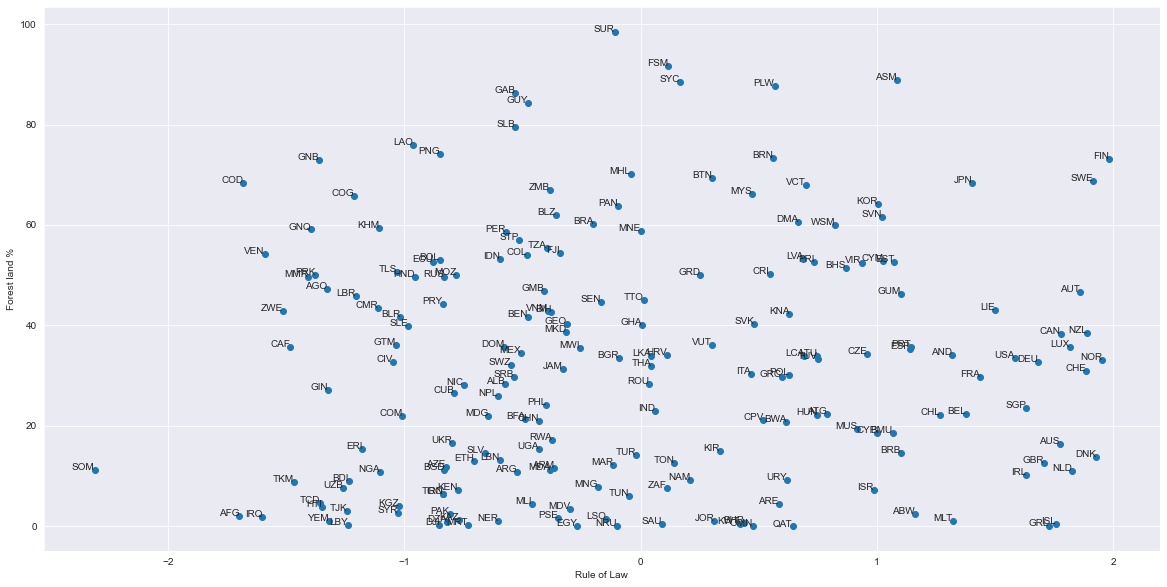

In [41]:
avg_rol = data.groupby("Country Code").mean()["Rule of Law: Estimate"]
join = pd.concat([avg_rol, avg_forest], axis=1).dropna()
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(join.iloc[:,0], join.iloc[:,1])
for i, txt in enumerate(join.iloc[:,0].index):
    ax.annotate(txt, (join.iloc[:,0][i],join.iloc[:,1][i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Rule of Law")
ax.set_ylabel("Forest land %")

### Fishing

Text(0, 0.5, 'Fishing quantity')

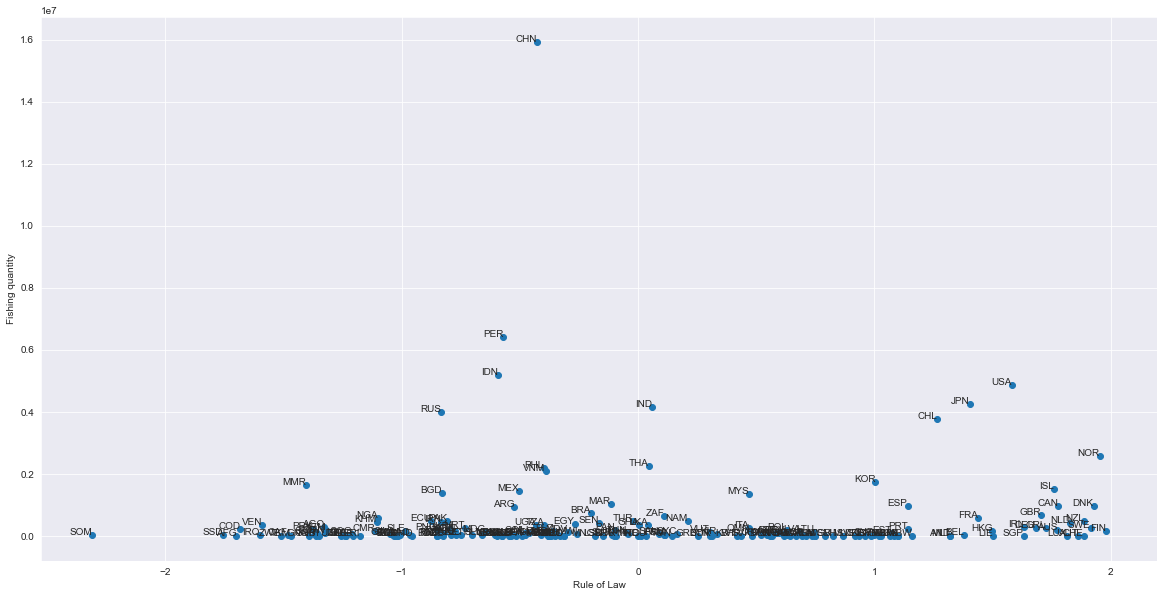

In [42]:
avg_rol = data.groupby("Country Code").mean()["Rule of Law: Estimate"]
join = pd.concat([avg_rol, avg_fishing], axis=1).dropna()
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(join.iloc[:,0], join.iloc[:,1])
for i, txt in enumerate(join.iloc[:,0].index):
    ax.annotate(txt, (join.iloc[:,0][i],join.iloc[:,1][i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Rule of Law")
ax.set_ylabel("Fishing quantity")

## Voice and accountability

### CO2

Text(0, 0.5, 'CO2 Emission')

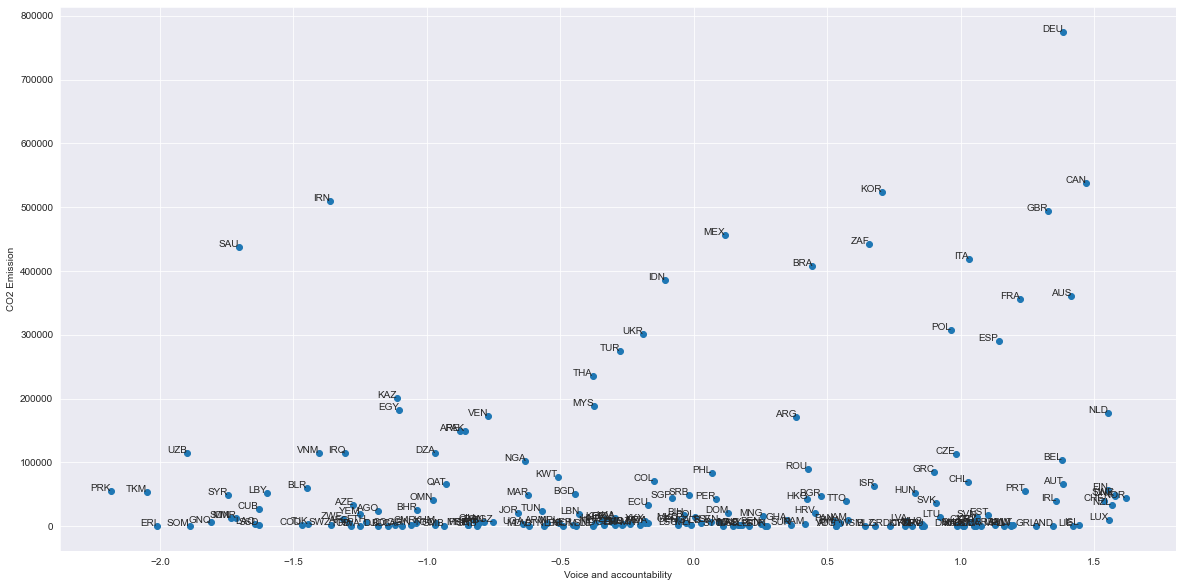

In [43]:
# Plot without outliers
avg_co2 = data[mask].groupby("Country Code").mean()["CO2 emissions"]
avg_voice = data[mask].groupby("Country Code").mean()["Voice and Accountability: Estimate"]
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(avg_voice, avg_co2)
for i, txt in enumerate(avg_co2.index):
    ax.annotate(txt, (avg_voice[i],avg_co2[i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Voice and accountability")
ax.set_ylabel("CO2 Emission")

### Forest

Text(0, 0.5, 'Forest land %')

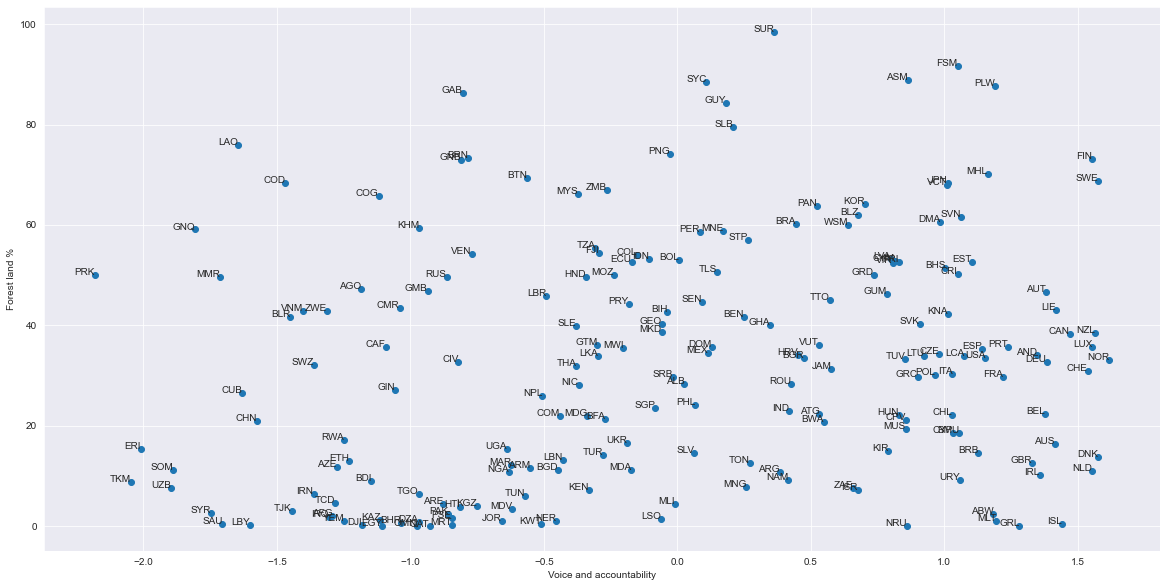

In [44]:
avg_voice = data.groupby("Country Code").mean()["Voice and Accountability: Estimate"]
join = pd.concat([avg_voice, avg_forest], axis=1).dropna()
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(join.iloc[:,0], join.iloc[:,1])
for i, txt in enumerate(join.iloc[:,0].index):
    ax.annotate(txt, (join.iloc[:,0][i],join.iloc[:,1][i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Voice and accountability")
ax.set_ylabel("Forest land %")

### Fishing

Text(0, 0.5, 'Fishing quantity')

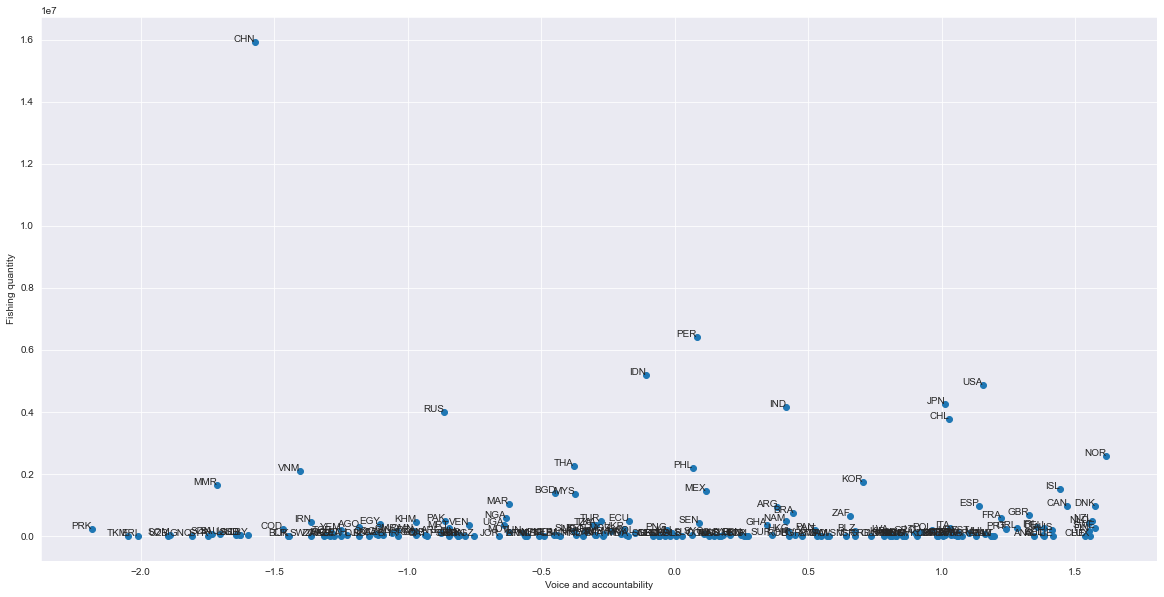

In [45]:
avg_voice = data.groupby("Country Code").mean()["Voice and Accountability: Estimate"]
join = pd.concat([avg_voice, avg_fishing], axis=1).dropna()
fig, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(join.iloc[:,0], join.iloc[:,1])
for i, txt in enumerate(join.iloc[:,0].index):
    ax.annotate(txt, (join.iloc[:,0][i],join.iloc[:,1][i]), size=10, xytext=(0,0), ha='right', textcoords='offset points')

ax.set_xlabel("Voice and accountability")
ax.set_ylabel("Fishing quantity")

# Data Preparation for Dynamic Analysis

Since the STATIC analyses didn't show any significant correlation between the countries, we decided to rather look, for a given country, how the evolution of a political factors from one year to another (in %) influences the evolution of the environmental factors (in %).

## Functions

Two steps:

- Dataframe with one row = country and one column = year, and value in cell = value of the variable 
- Same dataframe but with percentage evolution

In [46]:
def from_series_to_columns(df, serie_name):
    """
    Takes as input a dataframe with 
        - serie_name (=Year)
        - Country Code
        - variable (CO2 or whatever)
        
    Creates one dataframe per year and put all these dataframes in a list.
    """

    names = list(df[serie_name].unique())
    dfs = []
    for i, name in enumerate(names):
        temp_df = sub_df[df[serie_name]==name].copy()
        temp_df = temp_df.drop(columns=[serie_name])
        temp_df.columns = ["Country Code", str(name)]
        dfs.append(temp_df)
    return dfs

In [47]:
def merge_list_dfs(dfs):
    """
    Takes as input a list of dataframes and merge them based on country code. 
    """
    new_df = reduce(lambda  left,right: pd.merge(left,right,on=['Country Code'],
                                            how='outer'), dfs)
    return new_df

In [48]:
def get_int_cols_from_df(df):
    cols = df.columns
    int_cols = []
    for col in cols:
        try:
            _ = int(col)
            int_cols.append(col)
        except:
            pass
    
    return int_cols

In [49]:
def get_str_cols_from_df(df):
    cols = df.columns
    non_int_cols = []
    for col in cols:
        try:
            _ = int(col)
        except:
            non_int_cols.append(col)
            
    return non_int_cols

In [50]:
def order_columns(df):
    """
    Reorder columns : first one is country code (or more str cols), then increasing years
    """
    
    int_cols = get_int_cols_from_df(df)
    non_int_cols = get_str_cols_from_df(df)
    
    # Convert int_cols to int
    int_cols = [int(i) for i in int_cols]
            
    # Reorder columns
    ordered_cols = []
    ordered_cols.extend(non_int_cols)
    int_cols.sort()
    ordered_cols.extend([str(i) for i in int_cols])
    
    # Apply to df
    df = df.reindex(columns=ordered_cols)
    return df

In [51]:
def get_missing_years(df):
    """
    get missing years
    """
    df = order_columns(df)
    years = get_int_cols_from_df(df)
    new_cols = []
    prev = int(years[0])
    
    # Get missing years
    for year in years:
        year = int(year)
        if (year - prev == 1) or (year - prev==0):
            prev = year
            continue
        else:
            new_year = year
            while new_year - prev != 1:
                new_year -= 1
                new_cols.append(new_year)
            prev = year
                
    return new_cols

In [52]:
def create_missing_years(df):
    years_missing = get_missing_years(df)
    for year in years_missing:
        df[year] = np.NaN
    df = order_columns(df)
    return df

In [53]:
def interpolate(df):
    index = df["Country Code"] 
    int_cols = get_int_cols_from_df(df)
    new_df = df[int_cols].interpolate(method="linear", axis=1)
    new_df["Country Code"] = index
    return new_df

In [54]:
def compute_pct_change(df):
    index = df["Country Code"]
    cols = df.columns
    int_cols = get_int_cols_from_df(df)
    prev = int_cols[0]
    series = {}
    for i, col in enumerate(int_cols):
        serie = (df[col] - df[prev])/np.abs(df[prev])
        series[i] = serie
        prev = col
        
    new_df = pd.concat(series.values(), axis=1)
    new_df["Country Code"] = index
    new_df.columns = cols
    new_df.drop(columns=int_cols[0], inplace=True) #Drop the first column 
    return new_df

To build the "evolution" datasets, when we had missing years, we decided to conduct a linear interpolation on these missing years.

Note :

- Years are not incremented per 1 every time
- We have NaN in some columns

**Example** : in 2000 the forest was about 1,000 and in 2002 about 2,000. The year 2001 is missing. Therefore we assumed that the value of the year 2001 was about 1,500.

Overall we obtain ONE dataset for EACH variable (political & environmental). In each dataset:

- One row = One country
- One column = One year 
- The value in the cell corresponding to one year equals the % evolution from the previous year. 

## Evolution CO2

The following code creates the "evolution" dataframe for the CO2 variable.

In [55]:
### Percentage evolution dataframe
var = "CO2 emissions"

sub_df = data[["Country Code", "Year", var]].copy()
# Convert year column to multiple columns
sub_dfs = from_series_to_columns(sub_df, "Year")
    
# Merge them
new_df = merge_list_dfs(sub_dfs)

# Drop duplicate lines
new_df.drop_duplicates(inplace=True)

# Reorder
new_df = order_columns(new_df)

# Create missing years
new_df_bis = create_missing_years(new_df)

# Interpolate
new_df_bis2 = interpolate(new_df_bis)

# Final
evol_co2 = compute_pct_change(new_df_bis2)

In [56]:
#evol_co2.to_csv("evolution_co2.csv", index=False)

In [57]:
evol_co2.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country Code
0,-0.058,-0.061,-0.129,-0.147,0.192,0.161,0.134,-0.245,0.448,0.243,0.378,0.850,0.609,0.250,0.446,-0.121,-0.159,-0.064,0.067,-0.040,0.000,0.000,0.000,AFG
1,-0.065,-0.070,0.362,0.266,0.121,0.108,0.145,-0.030,0.021,-0.084,0.008,0.114,0.001,0.050,0.140,-0.060,-0.002,0.117,-0.159,-0.017,0.000,0.000,0.000,ALB
2,0.051,0.049,-0.089,-0.098,0.012,0.012,0.019,-0.033,0.212,-0.058,0.082,0.007,0.102,-0.018,0.017,0.073,0.034,0.081,0.053,-0.020,0.000,0.000,0.000,DZA
3,0.040,0.039,0.034,0.032,0.007,0.007,0.007,0.048,0.026,-0.051,-0.013,0.000,-0.041,0.000,-0.050,-0.007,-0.023,-0.031,0.008,0.008,0.000,0.000,0.000,AND
4,-0.151,-0.177,0.153,0.133,0.164,0.141,-0.284,1.073,0.019,0.162,0.130,0.022,0.081,0.046,0.053,0.117,-0.014,0.331,-0.229,0.003,0.000,0.000,0.000,AGO


## Evolution Forest

In [58]:
df = pd.read_csv("final_df_without_nan.csv")

### Percentage evolution dataframe
var = "Forest area (% of land area)"
sub_df = df[["Country Code", "Year", var]].copy()
sub_df.dropna(inplace=True)

# Convert year column to multiple columns
sub_dfs = from_series_to_columns(sub_df, "Year")
    
# Merge them
new_df = merge_list_dfs(sub_dfs)

# Drop duplicate lines
new_df.drop_duplicates(inplace=True)

# Reorder
new_df = order_columns(new_df)

# Create missing years
new_df_bis = create_missing_years(new_df)

# Interpolate
new_df_bis2 = interpolate(new_df_bis)

# Final
evol_forest = compute_pct_change(new_df_bis2)

In [59]:
evol_forest.to_csv("evol_forest.csv", index=False)

In [60]:
evol_forest.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Country Code
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,AFG
1,-0.003,-0.003,-0.003,-0.003,0.003,0.003,0.003,0.003,0.003,-0.002,-0.002,-0.002,-0.002,-0.002,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,ALB
2,-0.005,-0.005,-0.006,-0.006,-0.005,-0.005,-0.006,-0.006,-0.006,0.050,0.047,0.045,0.043,0.041,0.004,0.004,0.004,0.004,0.004,0.004,DZA
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,AND
4,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,AGO


## Evolution Fishing

In [61]:
df = pd.read_csv("final_df_without_nan.csv")

### Percentage evolution dataframe
var = "Capture fisheries production (metric tons)"
sub_df = df[["Country Code", "Year", var]].copy()
sub_df.dropna(inplace=True)

# Convert year column to multiple columns
sub_dfs = from_series_to_columns(sub_df, "Year")
    
# Merge them
new_df = merge_list_dfs(sub_dfs)

# Drop duplicate lines
new_df.drop_duplicates(inplace=True)

# Reorder
new_df = order_columns(new_df)

# Create missing years
new_df_bis = create_missing_years(new_df)

# Interpolate
new_df_bis2 = interpolate(new_df_bis)

# Final
evol_fishing = compute_pct_change(new_df_bis2)

In [62]:
evol_fishing.to_csv("evolution_fishing.csv", index=False)

In [63]:
evol_fishing.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Country Code
0,-0.038,-0.040,-0.083,-0.091,-0.050,-0.053,0.000,0.111,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,AFG
1,0.131,0.116,0.120,0.107,0.049,0.047,-0.234,0.624,0.099,0.130,-0.042,-0.009,0.083,-0.117,-0.064,0.793,0.043,0.007,-0.130,0.001,ALB
2,0.063,0.059,0.113,0.101,0.094,0.086,0.049,-0.195,0.113,0.154,0.011,-0.058,-0.080,-0.269,0.089,0.037,-0.043,-0.032,-0.019,-0.010,DZA
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,AND
4,0.092,0.084,0.234,0.189,0.034,0.033,-0.170,0.132,-0.156,0.114,0.357,-0.002,-0.111,0.140,0.103,0.094,0.088,0.086,0.120,-0.018,AGO


## Evolution Corruption

In [64]:
### Percentage evolution dataframe
var = "Control of Corruption: Estimate"

sub_df = df[["Country Code", "Year", var]].copy()
# Convert year column to multiple columns
sub_dfs = from_series_to_columns(sub_df, "Year")
    
# Merge them
new_df = merge_list_dfs(sub_dfs)

# Drop duplicate lines
new_df.drop_duplicates(inplace=True)

# Reorder
new_df = order_columns(new_df)

# Create missing years
new_df_bis = create_missing_years(new_df)

# Interpolate
new_df_bis2 = interpolate(new_df_bis)

# Final
evol_corruption = compute_pct_change(new_df_bis2)

In [65]:
evol_corruption.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country Code
0,0.043,0.045,-0.048,-0.046,0.012,0.013,-0.069,0.004,-0.073,0.007,-0.108,-0.032,0.063,-0.066,0.035,0.101,-0.012,0.057,0.009,-0.137,0.006,0.014,0.064,AFG
1,-0.078,-0.072,0.085,0.093,-0.007,-0.007,0.065,0.139,-0.124,-0.022,0.144,0.137,0.093,0.025,-0.301,-0.064,0.038,0.215,0.126,0.154,-0.032,-0.248,-0.013,ALB
2,-0.278,-0.217,-0.032,-0.031,0.033,0.034,0.209,0.018,0.290,-0.081,-0.074,-0.062,0.028,0.092,-0.038,0.076,0.059,-0.267,-0.076,-0.050,0.112,-0.047,0.013,DZA
3,0.023,0.022,-0.007,-0.007,-0.004,-0.004,0.020,-0.174,0.124,-0.015,0.008,0.015,0.029,-0.013,-0.022,-0.009,-0.006,-0.028,-0.005,0.008,0.011,-0.003,-0.004,AND
4,-0.102,-0.093,-0.042,-0.040,0.111,0.125,-0.116,0.005,0.013,0.059,-0.057,0.004,-0.093,0.056,-0.014,0.056,-0.032,-0.102,0.034,-0.032,0.019,0.190,0.079,AGO


## Evolution Government Effectiveness

In [66]:
### Percentage evolution dataframe
var = "Government Effectiveness: Estimate"

sub_df = df[["Country Code", "Year", var]].copy()
# Convert year column to multiple columns
sub_dfs = from_series_to_columns(sub_df, "Year")
    
# Merge them
new_df = merge_list_dfs(sub_dfs)

# Drop duplicate lines
new_df.drop_duplicates(inplace=True)

# Reorder
new_df = order_columns(new_df)

# Create missing years
new_df_bis = create_missing_years(new_df)

# Interpolate
new_df_bis2 = interpolate(new_df_bis)

# Final
evol_gov_effect = compute_pct_change(new_df_bis2)

In [67]:
evol_gov_effect.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country Code
0,0.009,0.009,-0.022,-0.022,0.149,0.175,0.310,0.174,-0.354,-0.181,0.019,-0.066,0.008,0.020,0.004,0.061,-0.018,0.039,0.006,0.073,-0.088,-0.092,-0.005,AFG
1,0.042,0.043,-0.098,-0.089,0.147,0.172,-0.009,0.227,-0.586,0.206,0.223,0.123,0.277,-0.096,0.264,-0.286,-0.183,0.730,1.120,0.290,5.313,0.370,-1.534,ALB
2,0.119,0.135,-0.081,-0.075,0.190,0.235,-0.025,0.065,0.183,-0.011,-0.197,-0.107,0.070,0.177,-0.177,0.057,-0.004,0.106,-0.049,-0.060,-0.109,0.247,-0.163,DZA
3,0.017,0.017,-0.005,-0.005,-0.008,-0.008,-0.009,0.081,-0.152,0.194,-0.023,0.019,0.002,-0.014,-0.009,0.018,0.005,0.116,0.040,0.041,0.041,0.004,-0.019,AND
4,-0.280,-0.219,-0.045,-0.043,0.076,0.083,0.066,-0.137,0.135,-0.204,0.119,0.120,0.096,-0.164,-0.032,0.142,-0.236,0.081,0.110,-0.036,0.010,-0.026,-0.062,AGO


## Evolution Political Stability 

In [68]:
### Percentage evolution dataframe
var = "Political Stability and Absence of Violence/Terrorism: Estimate"

sub_df = df[["Country Code", "Year", var]].copy()
# Convert year column to multiple columns
sub_dfs = from_series_to_columns(sub_df, "Year")
    
# Merge them
new_df = merge_list_dfs(sub_dfs)

# Drop duplicate lines
new_df.drop_duplicates(inplace=True)

# Reorder
new_df = order_columns(new_df)

# Create missing years
new_df_bis = create_missing_years(new_df)

# Interpolate
new_df_bis2 = interpolate(new_df_bis)

# Final
evol_political_stab = compute_pct_change(new_df_bis2)

In [69]:
evol_political_stab.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country Code
0,-0.002,-0.002,-0.004,-0.004,0.083,0.090,-0.080,-0.045,0.098,-0.073,-0.085,-0.116,-0.008,0.049,0.030,0.033,-0.042,0.043,-0.066,-0.039,-0.049,0.017,0.037,AFG
1,-0.313,-0.238,0.004,0.004,0.226,0.292,-0.048,-0.387,-0.184,-0.002,0.600,0.848,-0.468,-3.232,-0.475,0.491,1.640,4.286,-0.288,-0.004,0.098,-0.000,-0.687,ALB
2,-0.027,-0.026,0.118,0.134,-0.070,-0.066,-0.074,0.225,0.327,-0.231,-0.019,0.047,-0.094,-0.052,-0.080,0.026,0.093,0.010,0.084,-0.007,0.166,0.097,-0.214,DZA
3,0.006,0.006,-0.007,-0.007,0.049,0.047,0.143,-0.043,-0.012,-0.026,-0.006,-0.002,-0.031,-0.014,0.019,-0.009,-0.005,0.002,0.081,0.016,0.006,0.002,0.134,AND
4,-0.062,-0.059,0.060,0.064,0.113,0.127,0.362,-0.056,0.165,0.389,-0.229,0.455,0.043,0.349,-0.632,-0.054,-0.005,0.148,-0.503,0.369,-0.050,0.045,0.017,AGO


## Evolution Regulatory Quality

In [70]:
### Percentage evolution dataframe
var = "Regulatory Quality: Estimate"

sub_df = df[["Country Code", "Year", var]].copy()
# Convert year column to multiple columns
sub_dfs = from_series_to_columns(sub_df, "Year")
    
# Merge them
new_df = merge_list_dfs(sub_dfs)

# Drop duplicate lines
new_df.drop_duplicates(inplace=True)

# Reorder
new_df = order_columns(new_df)

# Create missing years
new_df_bis = create_missing_years(new_df)

# Interpolate
new_df_bis2 = interpolate(new_df_bis)

# Final
evol_regulatory_qual = compute_pct_change(new_df_bis2)

In [71]:
evol_regulatory_qual.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country Code
0,0.001,0.001,-0.005,-0.005,0.072,0.078,0.208,-0.053,-0.087,-0.019,-0.012,0.039,-0.033,0.084,-0.005,0.226,-0.000,0.063,0.108,-0.331,-0.009,0.156,0.009,AFG
1,0.318,0.465,-0.235,-0.190,0.058,0.062,-0.992,0.630,-1.244,0.726,1.596,1.434,0.615,-0.037,0.015,-0.145,0.053,0.059,-0.159,0.013,0.180,0.204,0.022,ALB
2,0.090,0.098,0.026,0.027,0.086,0.095,0.114,-0.052,0.295,-0.491,-0.088,-0.277,-0.351,-0.091,-0.016,-0.073,0.087,-0.100,0.085,0.001,-0.021,-0.055,-0.032,DZA
3,0.014,0.013,-0.009,-0.010,0.076,0.070,-0.015,-0.016,-0.045,-0.008,0.020,0.015,0.007,-0.012,0.162,-0.030,-0.001,-0.435,0.031,-0.045,0.385,-0.011,0.029,AND
4,-0.097,-0.088,-0.032,-0.031,0.093,0.103,0.172,-0.033,-0.005,0.099,0.096,-0.040,0.032,-0.004,-0.060,0.117,-0.087,0.062,0.080,-0.101,-0.043,0.162,-0.022,AGO


## Evolution Rule of Law

In [72]:
### Percentage evolution dataframe
var = "Rule of Law: Estimate"

sub_df = df[["Country Code", "Year", var]].copy()
# Convert year column to multiple columns
sub_dfs = from_series_to_columns(sub_df, "Year")
    
# Merge them
new_df = merge_list_dfs(sub_dfs)

# Drop duplicate lines
new_df.drop_duplicates(inplace=True)

# Reorder
new_df = order_columns(new_df)

# Create missing years
new_df_bis = create_missing_years(new_df)

# Interpolate
new_df_bis2 = interpolate(new_df_bis)

# Final
evol_rol = compute_pct_change(new_df_bis2)

In [73]:
evol_rol.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country Code
0,0.014,0.014,-0.012,-0.012,0.030,0.031,0.070,-0.092,0.023,-0.123,0.018,-0.019,0.009,0.001,-0.028,0.134,0.028,0.095,-0.040,0.004,-0.048,-0.063,-0.027,AFG
1,-0.175,-0.149,-0.046,-0.044,0.122,0.139,0.051,0.049,-0.071,0.070,0.056,0.089,0.150,0.186,-0.118,-0.143,0.004,0.348,0.029,-0.002,-0.222,0.023,-0.048,ALB
2,0.024,0.024,-0.022,-0.021,0.240,0.316,0.067,-0.057,-0.209,0.056,-0.091,0.040,-0.070,0.011,-0.029,0.044,0.107,-0.122,-0.117,0.008,-0.008,0.103,-0.052,DZA
3,0.024,0.023,0.041,0.039,-0.023,-0.023,-0.132,0.113,-0.194,-0.113,0.366,0.011,0.024,-0.016,0.169,-0.000,0.001,0.165,-0.040,0.001,0.015,0.003,-0.017,AND
4,-0.022,-0.021,0.011,0.011,0.014,0.014,0.059,0.017,0.046,0.089,-0.050,-0.001,0.100,-0.028,-0.000,-0.003,0.001,0.118,0.032,-0.005,-0.016,0.051,-0.006,AGO


## Evolution of Voice and accountability

In [74]:
### Percentage evolution dataframe
var = "Voice and Accountability: Estimate"

sub_df = df[["Country Code", "Year", var]].copy()
# Convert year column to multiple columns
sub_dfs = from_series_to_columns(sub_df, "Year")
    
# Merge them
new_df = merge_list_dfs(sub_dfs)

# Drop duplicate lines
new_df.drop_duplicates(inplace=True)

# Reorder
new_df = order_columns(new_df)

# Create missing years
new_df_bis = create_missing_years(new_df)

# Interpolate
new_df_bis2 = interpolate(new_df_bis)

# Final
evol_voice = compute_pct_change(new_df_bis2)

In [75]:
evol_voice.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country Code
0,-0.034,-0.033,0.002,0.002,0.147,0.173,0.178,-0.022,0.065,0.013,0.047,-0.105,-0.177,-0.021,0.049,0.051,0.022,0.084,0.016,0.071,0.046,-0.003,0.005,AFG
1,0.201,0.252,0.132,0.152,0.486,0.944,9.626,-0.897,-0.493,19.668,0.489,0.548,-0.191,-0.125,-0.497,-0.646,1.216,1.940,0.093,0.088,0.190,0.021,-0.269,ALB
2,-0.033,-0.032,0.054,0.057,0.029,0.030,-0.031,0.255,0.108,-0.281,-0.073,0.004,-0.060,0.015,0.018,0.098,0.014,0.087,-0.042,-0.016,-0.047,-0.086,-0.057,DZA
3,-0.011,-0.011,0.002,0.002,-0.032,-0.033,-0.010,0.099,-0.022,-0.130,-0.018,0.015,-0.002,0.001,0.027,0.054,-0.019,-0.171,0.024,-0.015,-0.014,-0.078,0.065,AND
4,0.053,0.056,-0.016,-0.016,0.075,0.081,-0.027,-0.010,0.039,-0.014,0.053,0.056,-0.006,0.005,-0.004,0.044,-0.035,-0.028,-0.028,0.032,0.037,0.163,0.154,AGO


# Dynamic Bivariate Analysis

Now, we want to see if the evolution of a political factor influences the evolution of an environmental factor. 

**Example**: does an increase in political instability lead to a decrease in forest area ? 

To do so, and not to provide too much information, we will only focus on the most correlated variables, which are: 

- Political Stability & Forest
- Voice and accountability & Forest
- Government Effectiveness & CO2
- Government Effectiveness & Fisheries


## Political Stability & Forest

Text(0.5, 1.0, 'GUM')

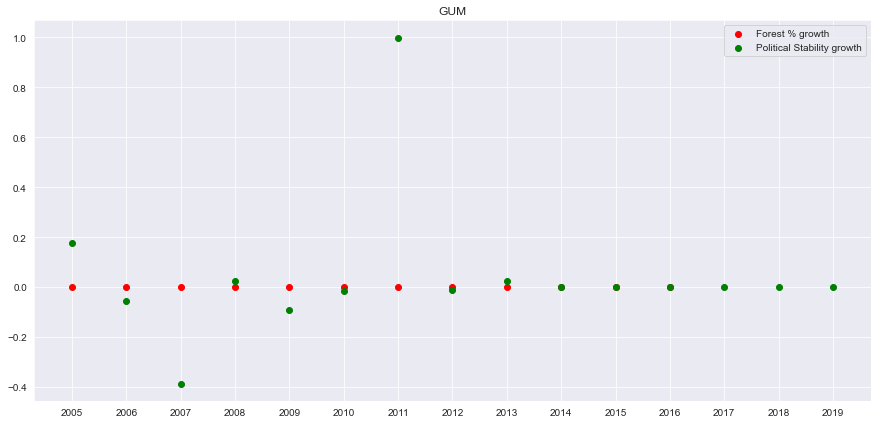

In [76]:
# Example
countries = evol_forest["Country Code"].tolist()
code = random.choice(countries)
ex_env = evol_forest[evol_forest["Country Code"]==code].drop(columns=["Country Code"])
ex_pol = evol_political_stab[evol_political_stab["Country Code"]==code].drop(columns=["Country Code"])

# Example plot
plt.figure(figsize=(15,7))
plt.scatter(ex_env.columns, ex_env, color='red', label="Forest % growth")
plt.scatter(ex_pol.columns, ex_pol, color='g', label="Political Stability growth")
plt.legend()
plt.title(code)

In [77]:
# Average of correlations
correlations = []
countries = evol_forest["Country Code"].tolist()

for country in countries:
  ex_env = evol_forest[evol_forest["Country Code"]==country].drop(columns=["Country Code"])
  ex_pol = evol_political_stab[evol_political_stab["Country Code"]==country].drop(columns=["Country Code"]) 
  join = pd.concat([ex_env.T, ex_pol.T], axis=1).dropna()
  correlation = np.corrcoef(join.iloc[:,0], join.iloc[:,1])[0,1]
  if str(correlation) != "nan":
    correlations.append(correlation)

mean_corr = sum(correlations)/len(correlations)

In [78]:
print("Average correlation is :", mean_corr)

Average correlation is : 0.00898548335332742


No overall correlation, so there is no identified link between the evolution of the political stability and the evolution of the forest land. 

Maybe the average correlation is null but it works for some countries ? 

In [79]:
# Countries with strong correlations
dico = dict(zip(countries, correlations))

In [80]:
filtered_dict = {k:v for k,v in dico.items() if np.abs(v) >= 0.4}

In [81]:
filtered_dict

{'ALB': -0.44181907836237694,
 'COL': 0.48610548170252993,
 'ERI': -0.4336326638676377,
 'EST': 0.425237362249352,
 'MLI': 0.4756801884434646,
 'NPL': -0.5148176786146175,
 'NIC': 0.49034338837694613,
 'SAU': 0.42252399681269254,
 'SLE': 0.4406741556972522,
 'SWE': -0.5867551970873705,
 'THA': -0.5735656863151068,
 'USA': 0.5152340415645562}

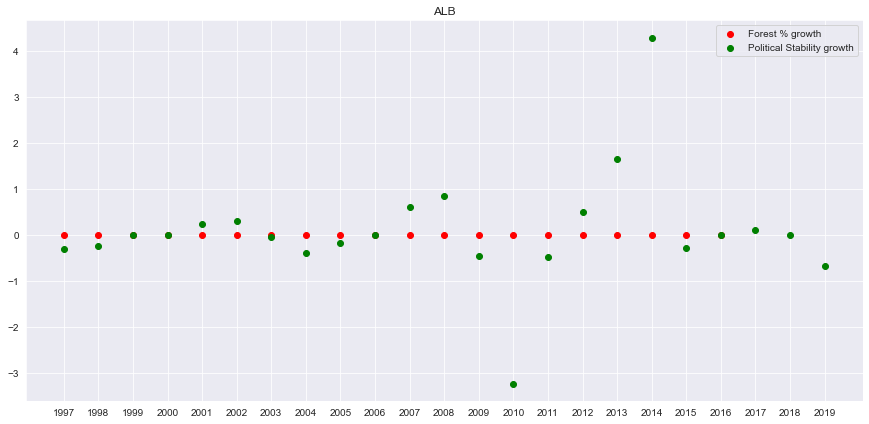

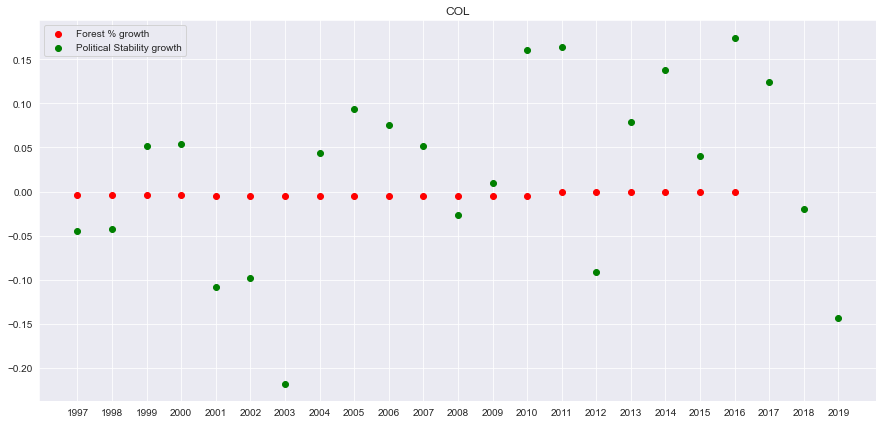

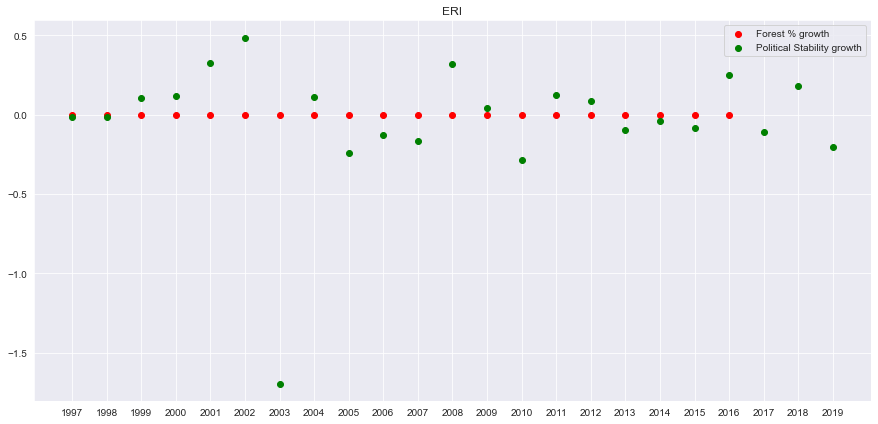

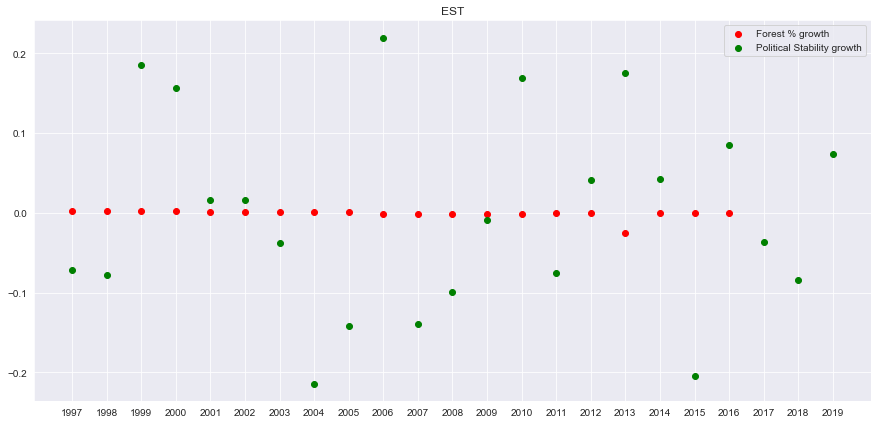

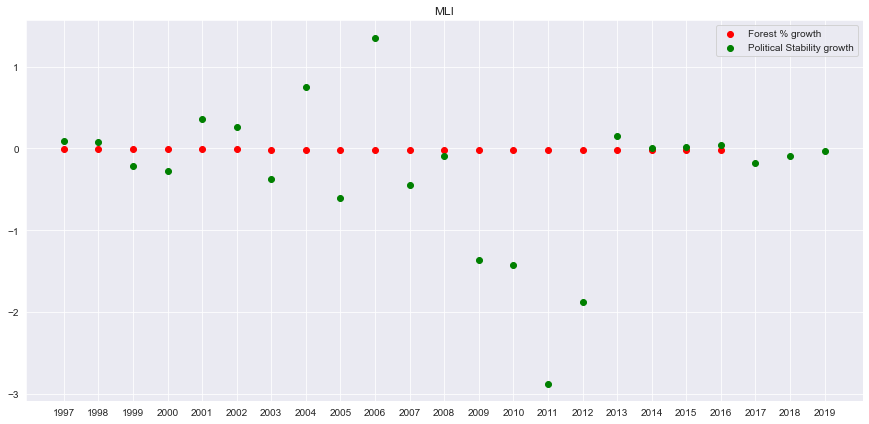

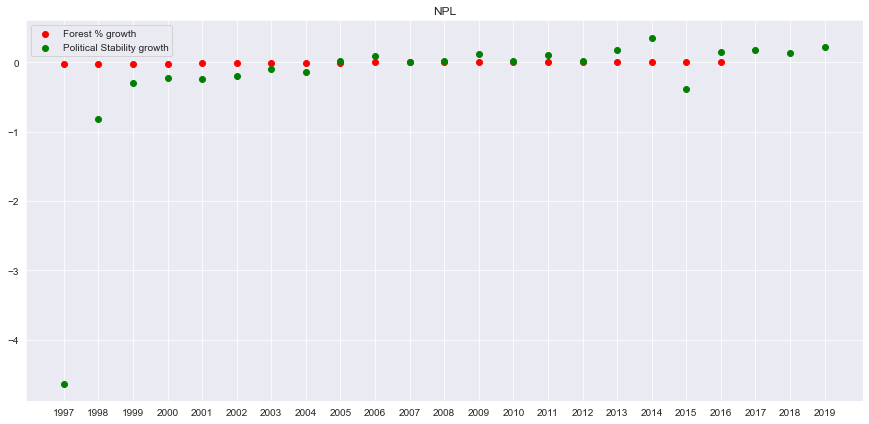

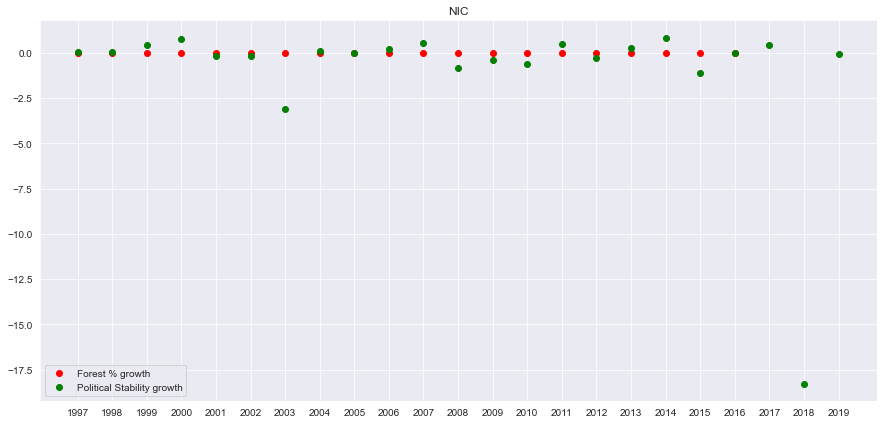

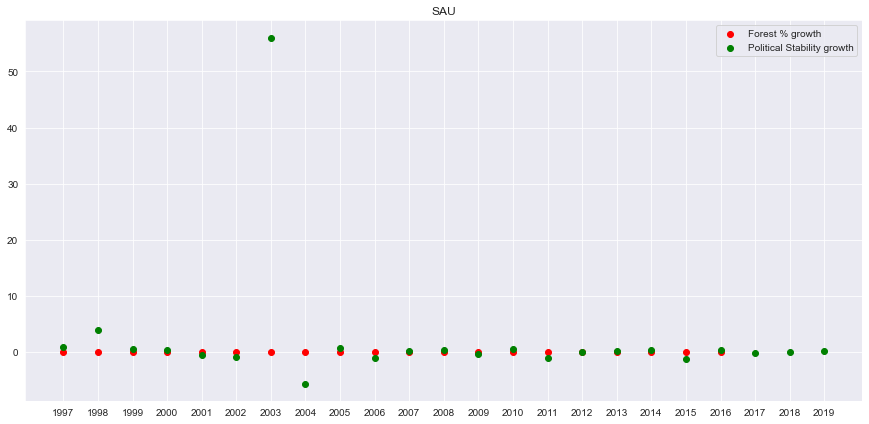

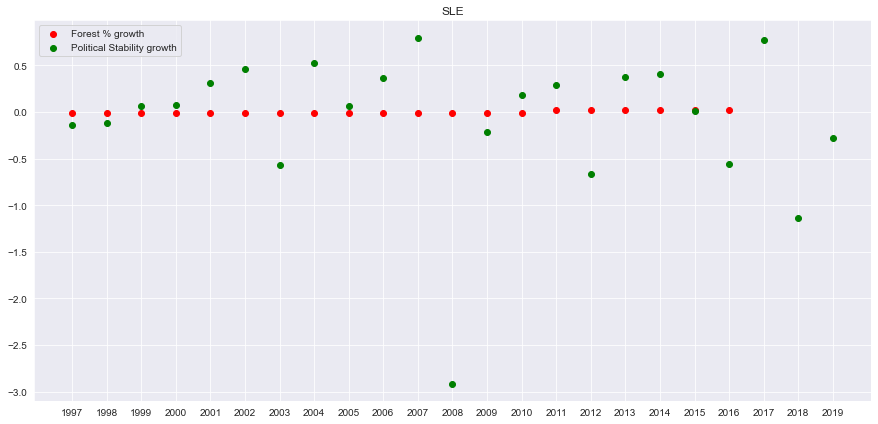

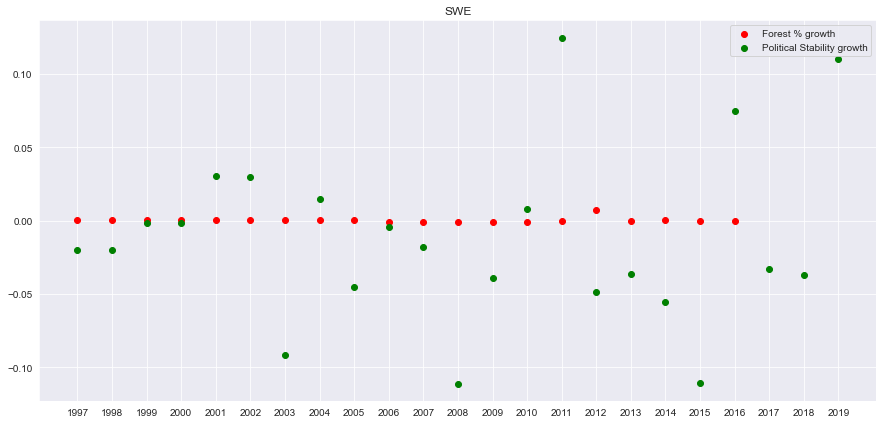

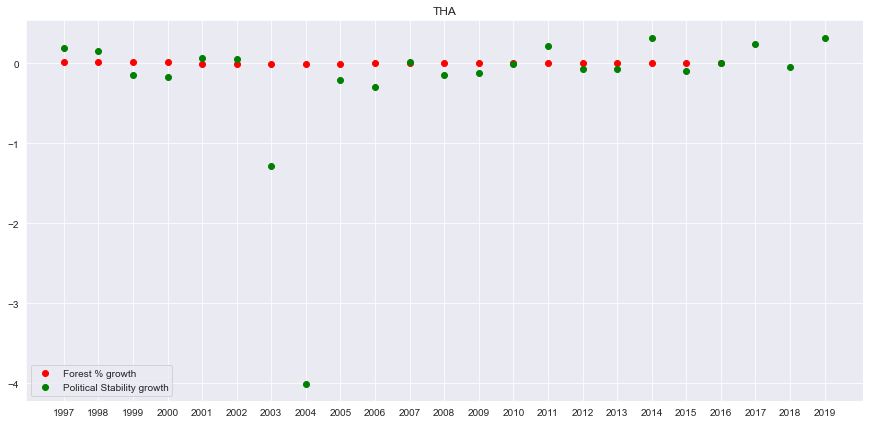

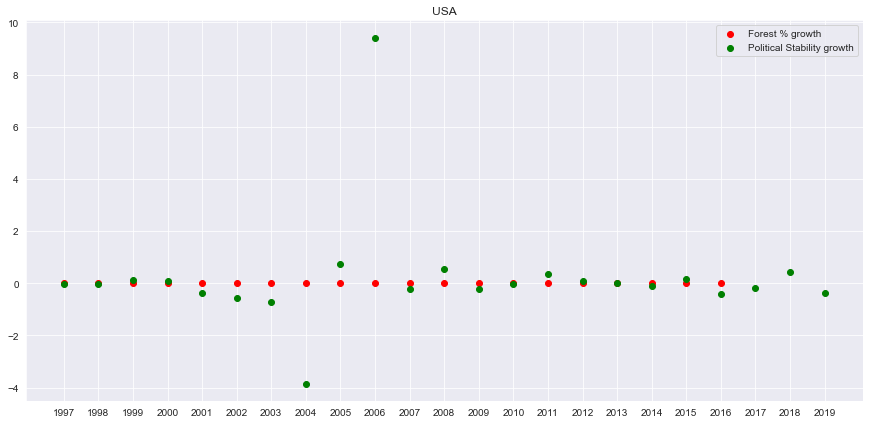

In [82]:
for key, val in filtered_dict.items():
  ex_env = evol_forest[evol_forest["Country Code"]==key].drop(columns=["Country Code"])
  ex_pol = evol_political_stab[evol_political_stab["Country Code"]==key].drop(columns=["Country Code"])

  # Example plot
  plt.figure(figsize=(15,7))
  plt.scatter(ex_env.columns, ex_env, color='red', label="Forest % growth")
  plt.scatter(ex_pol.columns, ex_pol, color='g', label="Political Stability growth")
  plt.title(key)
  plt.legend()

## Voice and accountability & Forest

Text(0.5, 1.0, 'SRB')

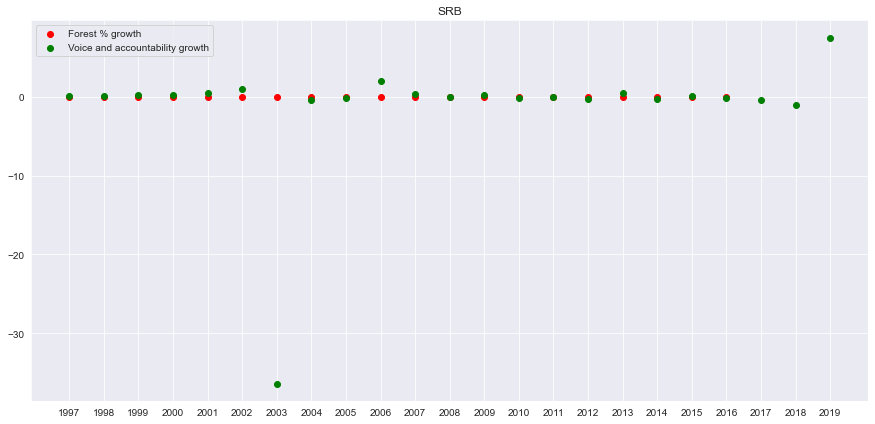

In [83]:
# Example
countries = evol_forest["Country Code"].tolist()
code = random.choice(countries)
ex_env = evol_forest[evol_forest["Country Code"]==code].drop(columns=["Country Code"])
ex_pol = evol_voice[evol_voice["Country Code"]==code].drop(columns=["Country Code"])

# Example plot
plt.figure(figsize=(15,7))
plt.scatter(ex_env.columns, ex_env, color='red', label="Forest % growth")
plt.scatter(ex_pol.columns, ex_pol, color='g', label="Voice and accountability growth")
plt.legend()
plt.title(code)

In [84]:
# Average of correlations
correlations = []
countries = evol_forest["Country Code"].tolist()

for country in countries:
  ex_env = evol_forest[evol_forest["Country Code"]==country].drop(columns=["Country Code"])
  ex_pol = evol_voice[evol_voice["Country Code"]==country].drop(columns=["Country Code"]) 
  join = pd.concat([ex_env.T, ex_pol.T], axis=1).dropna()
  correlation = np.corrcoef(join.iloc[:,0], join.iloc[:,1])[0,1]
  if str(correlation) != "nan":
    correlations.append(correlation)

mean_corr = sum(correlations)/len(correlations)

In [85]:
print("Average correlation is :", mean_corr)

Average correlation is : -0.02409669377947286


There is almost no correlation, we cannot identify a link between the evolution of the voice and accountability index with an evolution of the % of forest land. 

What about in some countries ? 

In [86]:
# Countries with strong correlations
dico = dict(zip(countries, correlations))

# Filter on 'high' correlations
filtered_dict = {k:v for k,v in dico.items() if np.abs(v) >= 0.6}

In [87]:
filtered_dict

{'CHN': -0.6778900658079443,
 'CUB': 0.6592882120144723,
 'MYS': -0.7537255571237342,
 'MLI': 0.6619307037415794,
 'SYC': -0.6434622828498711,
 'THA': -0.8621561999634195,
 'GBR': -0.6558590191324177}

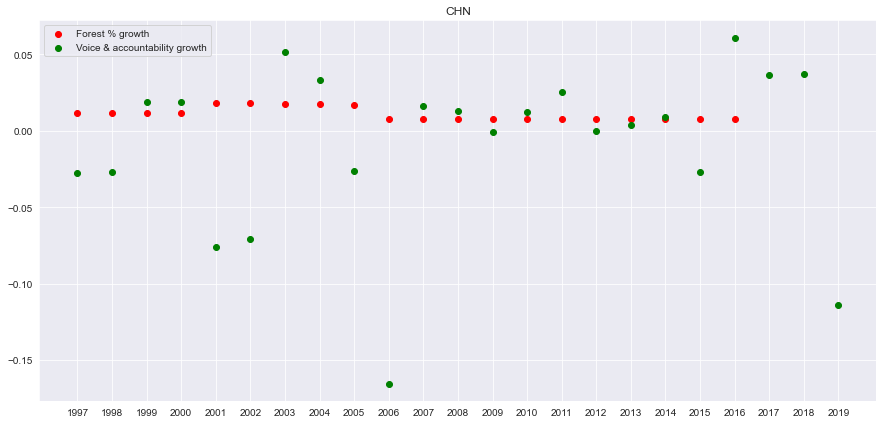

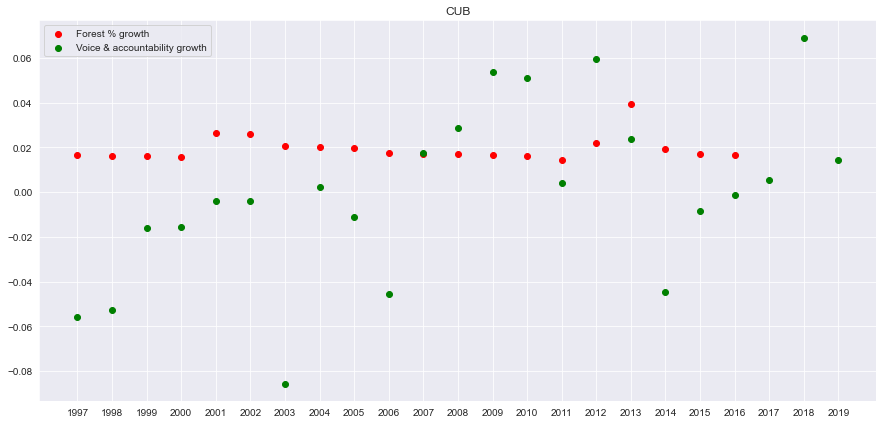

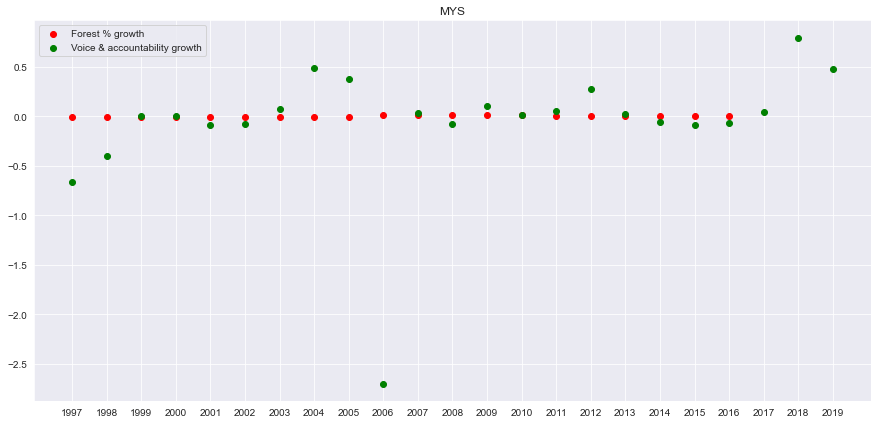

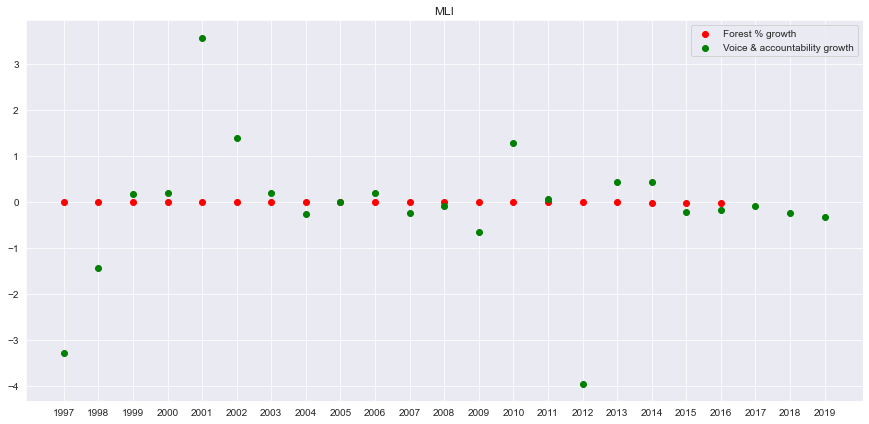

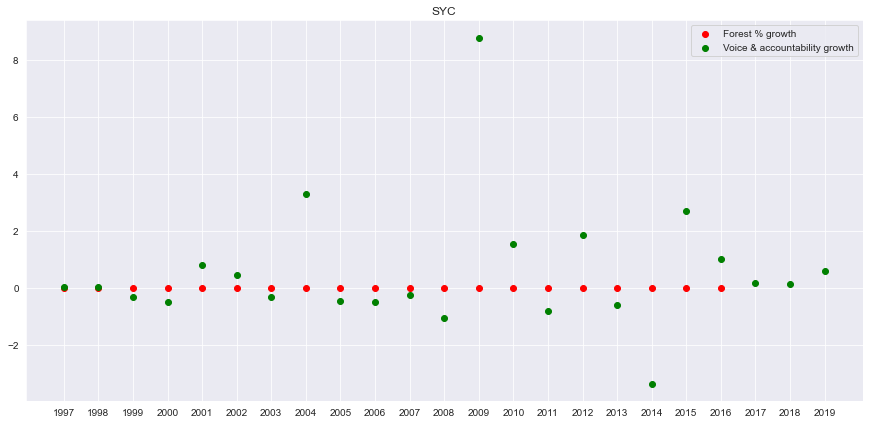

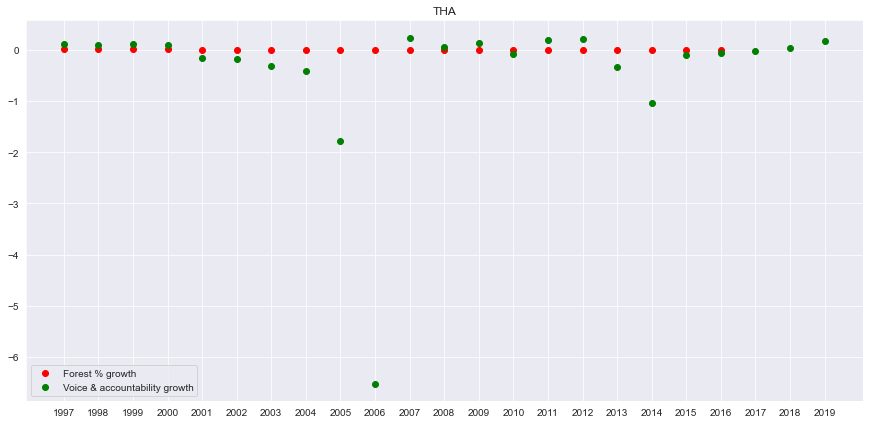

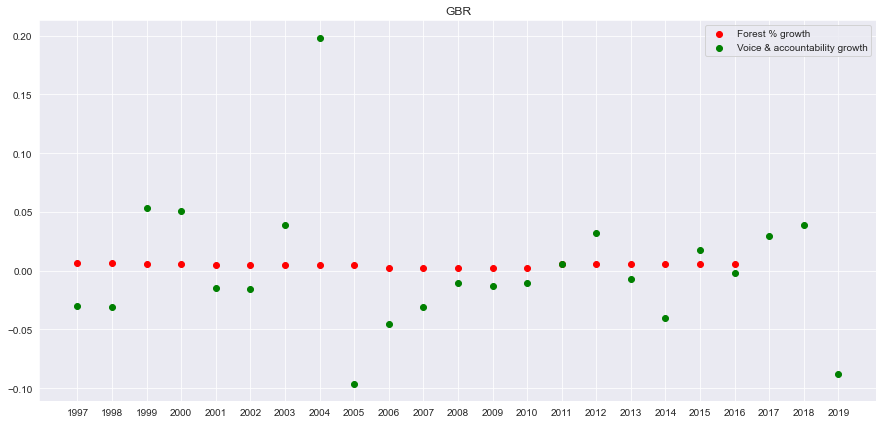

In [88]:
for key, val in filtered_dict.items():
  ex_env = evol_forest[evol_forest["Country Code"]==key].drop(columns=["Country Code"])
  ex_pol = evol_voice[evol_voice["Country Code"]==key].drop(columns=["Country Code"])

  # Example plot
  plt.figure(figsize=(15,7))
  plt.scatter(ex_env.columns, ex_env, color='red', label="Forest % growth")
  plt.scatter(ex_pol.columns, ex_pol, color='g', label="Voice & accountability growth")
  plt.title(key)
  plt.legend()

## Government Effectiveness & CO2

Text(0.5, 1.0, 'SDN')

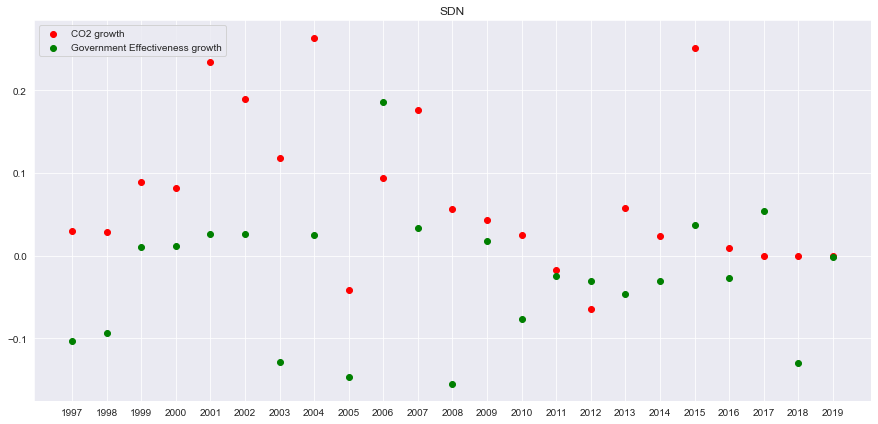

In [89]:
# Example
countries = evol_co2["Country Code"].tolist()
code = random.choice(countries)
ex_env = evol_co2[evol_co2["Country Code"]==code].drop(columns=["Country Code"])
ex_pol = evol_gov_effect[evol_gov_effect["Country Code"]==code].drop(columns=["Country Code"])

# Example plot
plt.figure(figsize=(15,7))
plt.scatter(ex_env.columns, ex_env, color='red', label="CO2 growth")
plt.scatter(ex_pol.columns, ex_pol, color='g', label="Government Effectiveness growth")
plt.legend()
plt.title(code)

In [90]:
# Average of correlations
correlations = []
countries = evol_co2["Country Code"].tolist()

for country in countries:
  ex_env = evol_co2[evol_co2["Country Code"]==country].drop(columns=["Country Code"])
  ex_pol = evol_gov_effect[evol_gov_effect["Country Code"]==country].drop(columns=["Country Code"]) 
  join = pd.concat([ex_env.T, ex_pol.T], axis=1).dropna()
  correlation = np.corrcoef(join.iloc[:,0], join.iloc[:,1])[0,1]
  if str(correlation) != "nan":
    correlations.append(correlation)

mean_corr = sum(correlations)/len(correlations)

In [91]:
print("Average correlation is :", mean_corr)

Average correlation is : 0.042749899613488636


There is almost no correlation, we cannot link the evolution of government effectiveness with an evolution of CO2 emissions. 

What about individual countries ? 

In [92]:
# Countries with strong correlations
dico = dict(zip(countries, correlations))

# Filter on 'high' correlations
filtered_dict = {k:v for k,v in dico.items() if np.abs(v) >= 0.44}

In [93]:
filtered_dict

{'TCD': -0.5569659895808623,
 'CRI': 0.47226253882123714,
 'GRD': 0.45865892353372517,
 'GNB': -0.44761191668764866,
 'IDN': -0.5551081542863683,
 'IRQ': 0.4477571973471808,
 'ISR': 0.5096855411989489,
 'KOR': 0.6658000591509355,
 'NPL': 0.45620164169980004,
 'SEN': -0.4620040071014735,
 'SVN': 0.48146355647935607,
 'SYR': 0.46645241426981465,
 'TLS': 0.47717339840938133,
 'FSM': -0.5592567013512847,
 'ASM': 0.6841268502264699,
 'GUM': -0.5296793766050364}

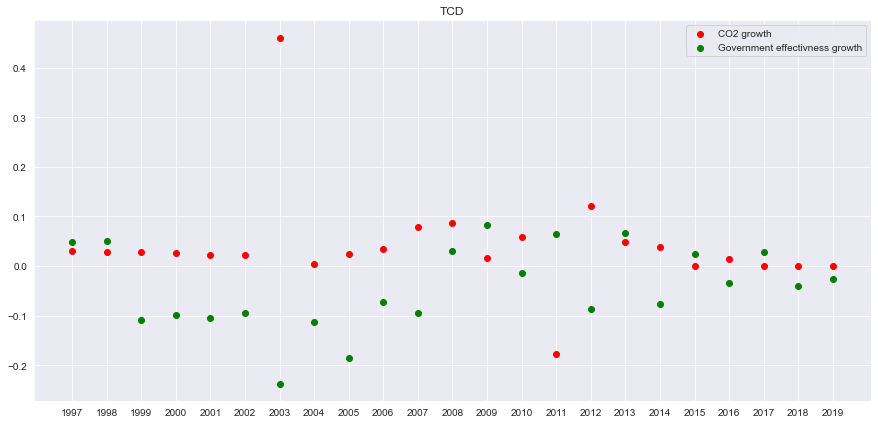

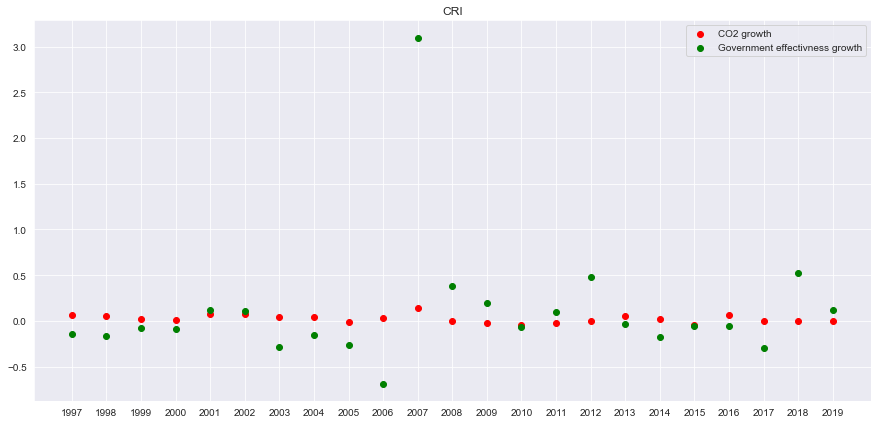

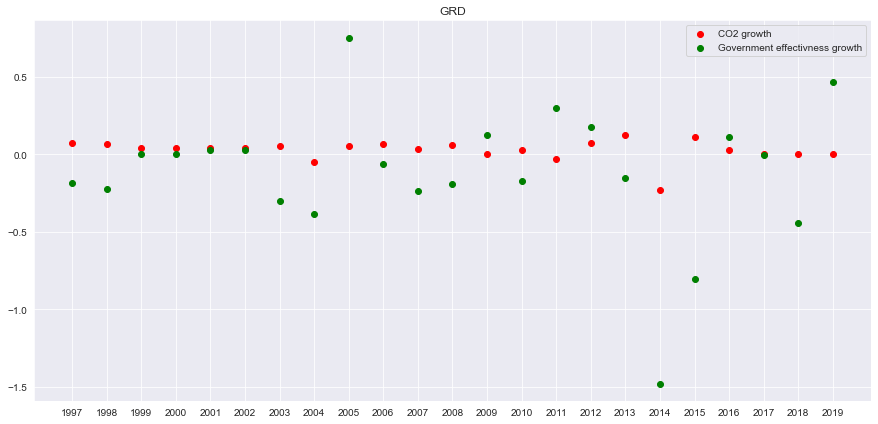

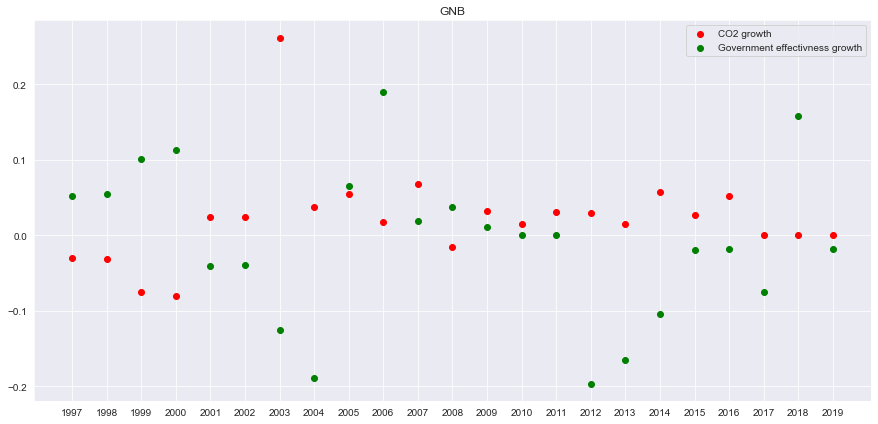

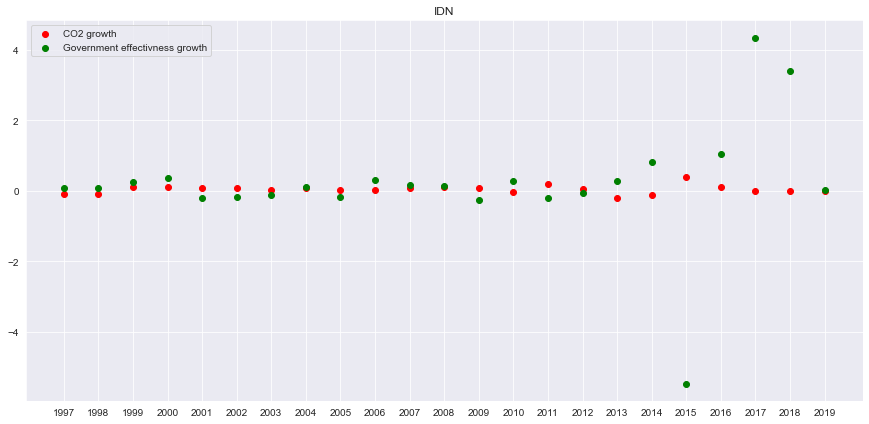

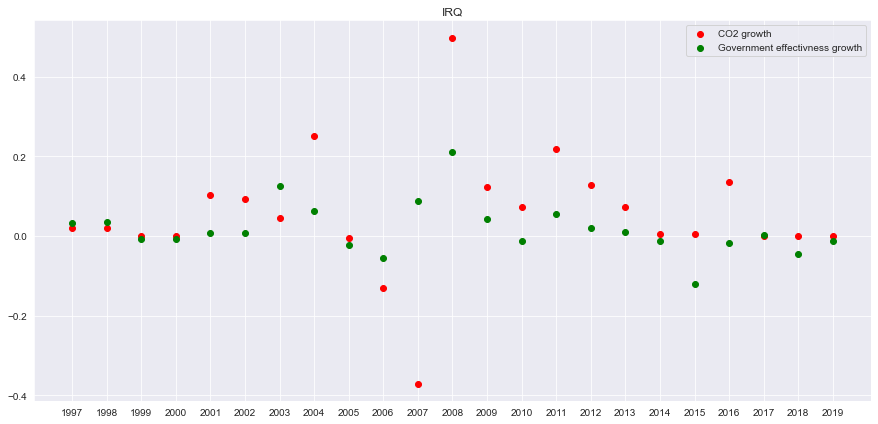

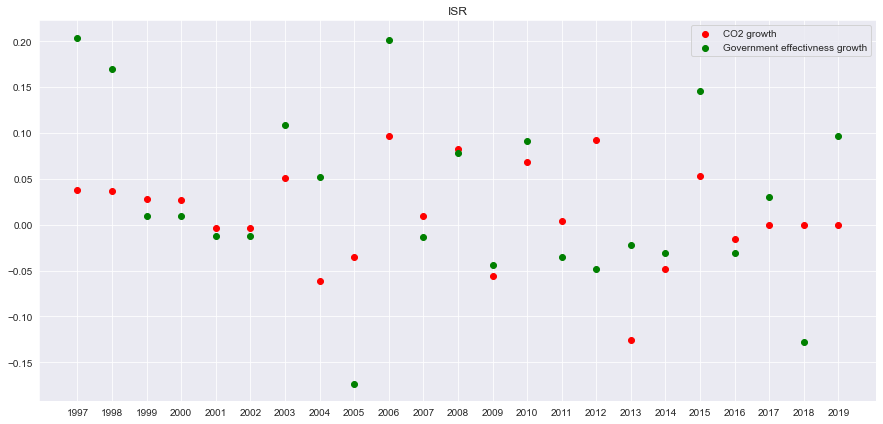

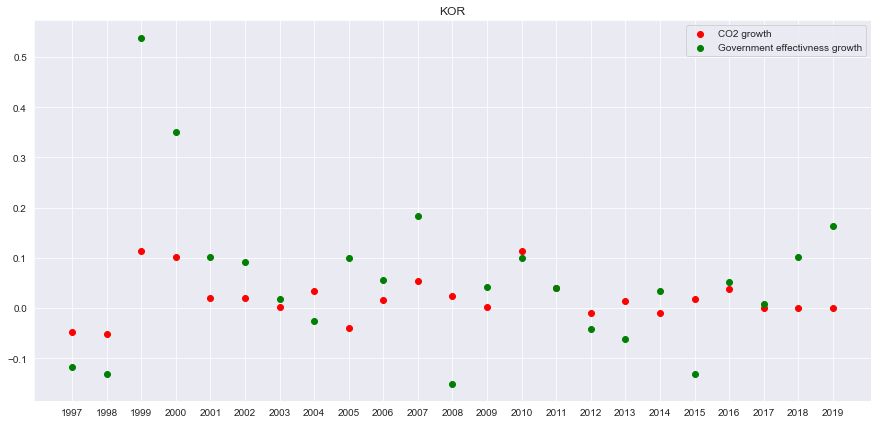

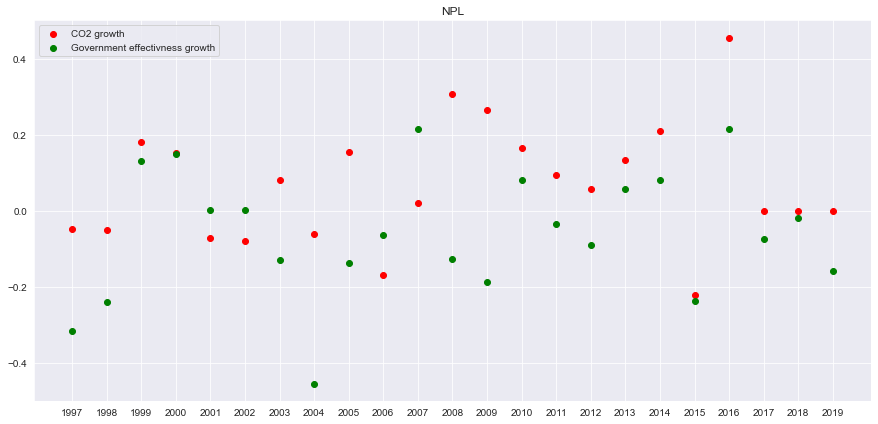

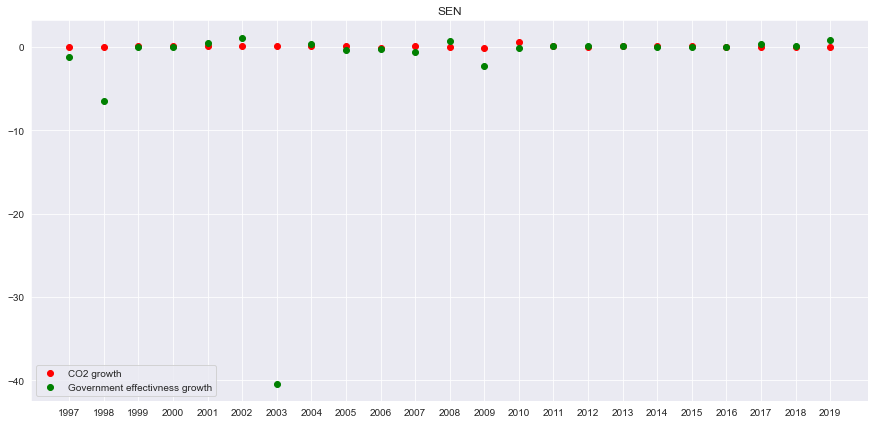

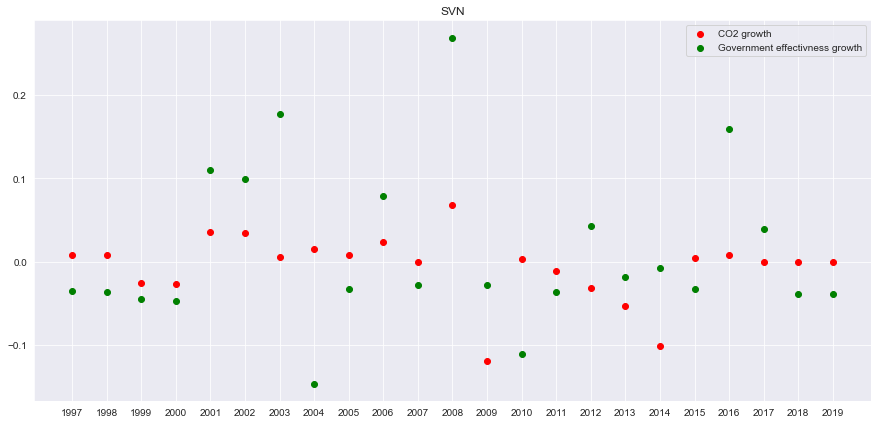

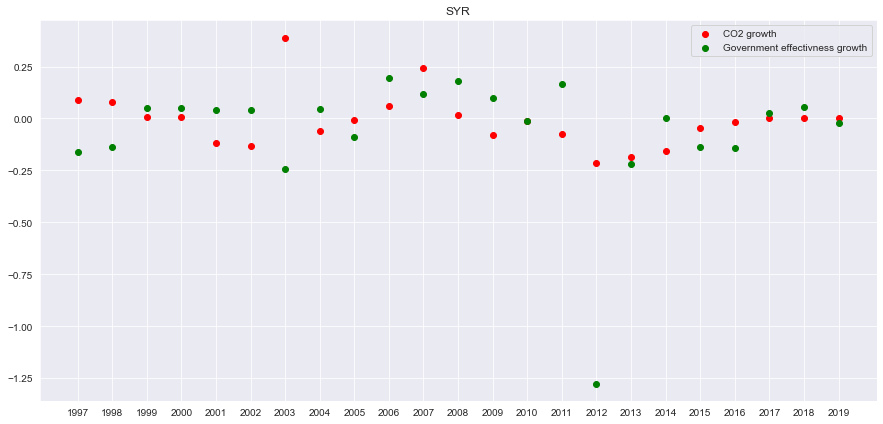

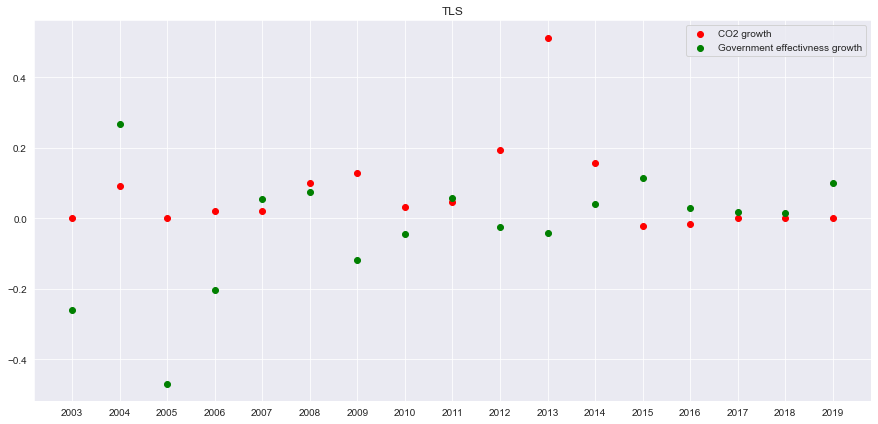

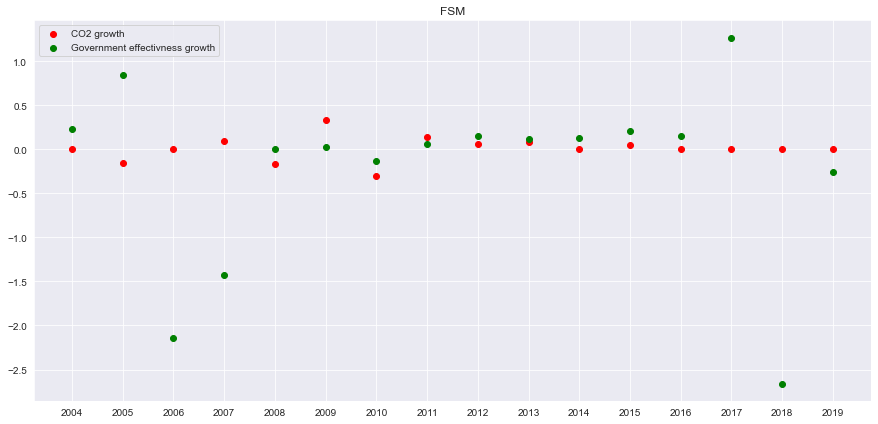

In [94]:
del filtered_dict['ASM']
del filtered_dict['GUM']

for key, val in filtered_dict.items():
  ex_env = evol_co2[evol_co2["Country Code"]==key].drop(columns=["Country Code"])
  ex_pol = evol_gov_effect[evol_gov_effect["Country Code"]==key].drop(columns=["Country Code"])

  # Example plot
  plt.figure(figsize=(15,7))
  plt.scatter(ex_env.columns, ex_env, color='red', label="CO2 growth")
  plt.scatter(ex_pol.columns, ex_pol, color='g', label="Government effectivness growth")
  plt.title(key)
  plt.legend()

**Look at Iraq !**


## Government Effectiveness & Fisheries

Text(0.5, 1.0, 'GBR')

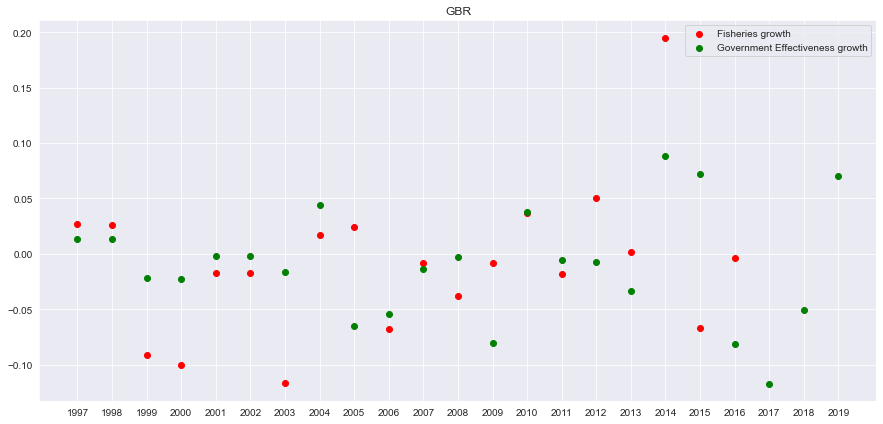

In [95]:
# Example
countries = evol_fishing["Country Code"].tolist()
code = random.choice(countries)
ex_env = evol_fishing[evol_fishing["Country Code"]==code].drop(columns=["Country Code"])
ex_pol = evol_gov_effect[evol_gov_effect["Country Code"]==code].drop(columns=["Country Code"])

# Example plot
plt.figure(figsize=(15,7))
plt.scatter(ex_env.columns, ex_env, color='red', label="Fisheries growth")
plt.scatter(ex_pol.columns, ex_pol, color='g', label="Government Effectiveness growth")
plt.legend()
plt.title(code)

In [96]:
# Average of correlations
correlations = []
countries = evol_fishing["Country Code"].tolist()

for country in countries:
  ex_env = evol_fishing[evol_fishing["Country Code"]==country].drop(columns=["Country Code"])
  ex_pol = evol_gov_effect[evol_gov_effect["Country Code"]==country].drop(columns=["Country Code"]) 
  join = pd.concat([ex_env.T, ex_pol.T], axis=1).dropna()
  correlation = np.corrcoef(join.iloc[:,0], join.iloc[:,1])[0,1]
  if str(correlation) != "nan":
    correlations.append(correlation)

mean_corr = sum(correlations)/len(correlations)

In [97]:
print("Average correlation is :", mean_corr)

Average correlation is : -0.017907455698515175


In [98]:
# Countries with strong correlations
dico = dict(zip(countries, correlations))

# Filter on 'high' correlations
filtered_dict = {k:v for k,v in dico.items() if np.abs(v) >= 0.55}

In [99]:
filtered_dict

{'AZE': 0.6602307087592298,
 'MWI': 0.557196029727802,
 'PNG': -0.6783234515987618,
 'SYC': -0.5932642627141357,
 'PSE': 0.7145369218496881}

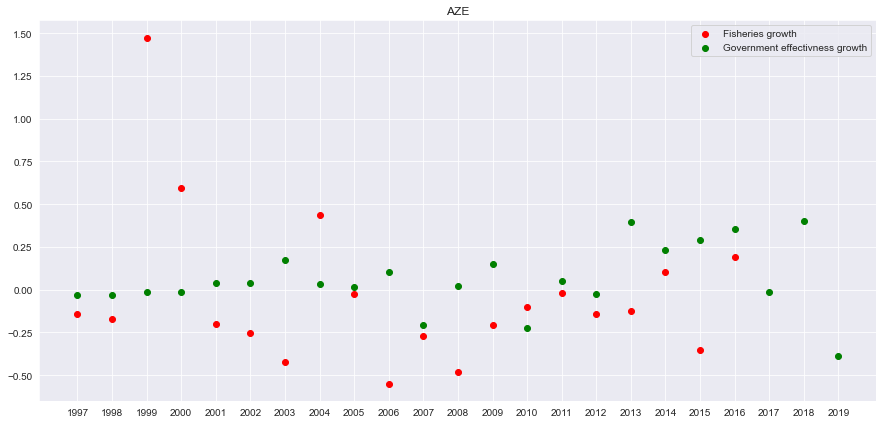

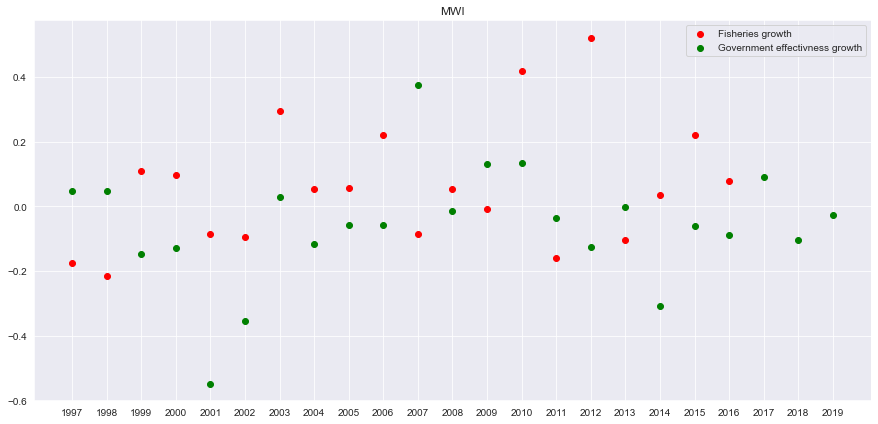

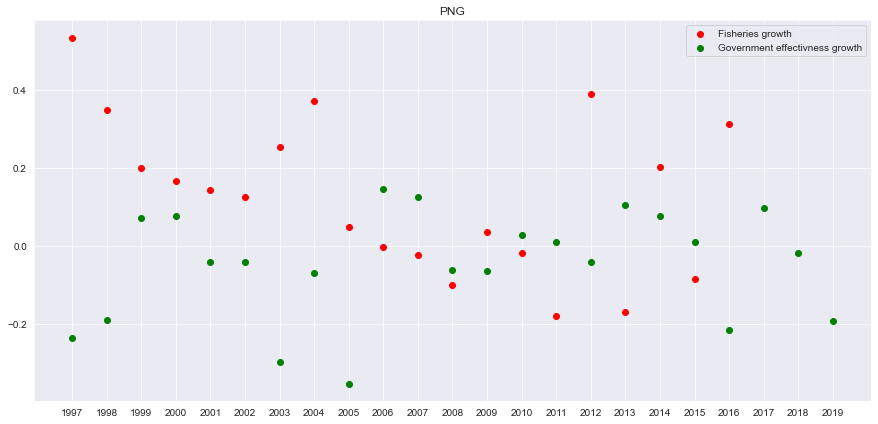

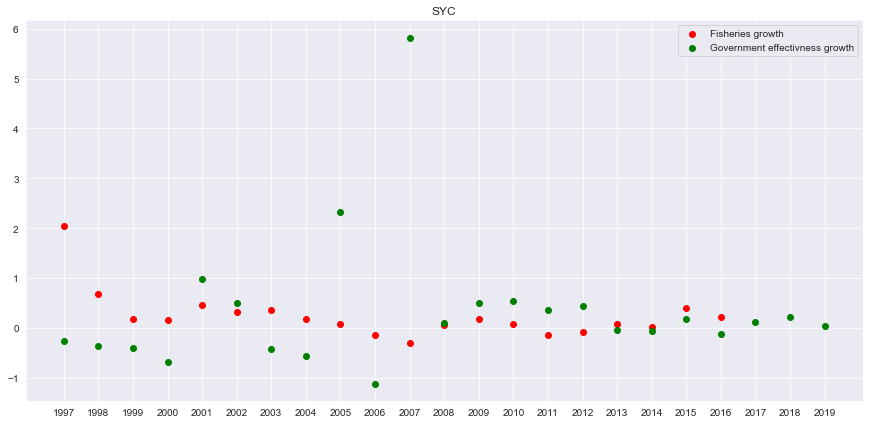

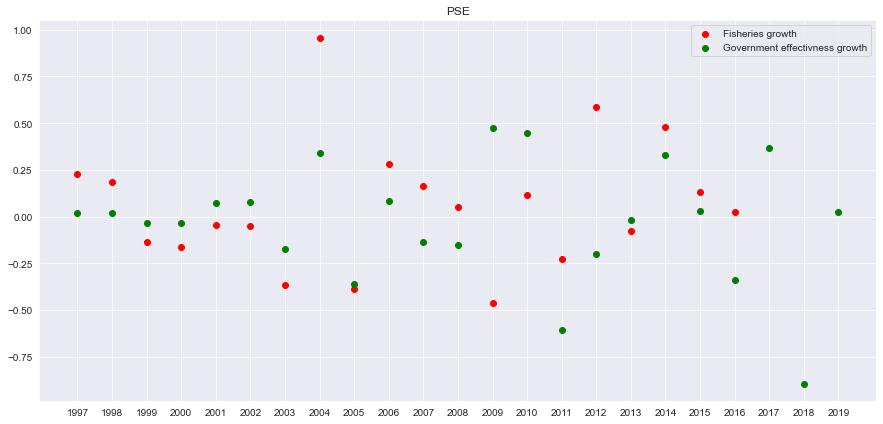

In [100]:
for key, val in filtered_dict.items():
  ex_env = evol_fishing[evol_fishing["Country Code"]==key].drop(columns=["Country Code"])
  ex_pol = evol_gov_effect[evol_gov_effect["Country Code"]==key].drop(columns=["Country Code"])

  # Example plot
  plt.figure(figsize=(15,7))
  plt.scatter(ex_env.columns, ex_env, color='red', label="Fisheries growth")
  plt.scatter(ex_pol.columns, ex_pol, color='g', label="Government effectivness growth")
  plt.title(key)
  plt.legend()

# Cluster-based analysis on evolution data

In this cluster-based analysis, we decided to consider evolution of two environmental variables (forest area and C02 emission) and two governance indicators (political stability and voice & accountability) that showed highest correlation in the previous analysis.

In [101]:
# Merging evolution dataframes with countries metadata

## Environmental variables 
df_cluster_based_evol_forests = pd.merge(evol_forest, df_countries,  how='left', 
                     left_on=['Country Code'], 
                     right_on = ['Country Code'])
df_cluster_based_evol_co2 = pd.merge(evol_co2, df_countries,  how='left', 
                     left_on=['Country Code'], 
                     right_on = ['Country Code'])

## Governance indicators
df_cluster_based_evol_political_stability = pd.merge(evol_political_stab, df_countries,  how='left', 
                     left_on=['Country Code'], 
                     right_on = ['Country Code'])
df_cluster_based_evol_voice = pd.merge(evol_voice, df_countries,  how='left', 
                     left_on=['Country Code'], 
                     right_on = ['Country Code'])

## Univariate cluster-based analysis

### Environmental variables

#### Forests

In [102]:
# Creating separate dataframes for high and low income countries
df_evol_forests_low_income = df_cluster_based_evol_forests[df_cluster_based_evol_forests["IncomeGroup"]== "Low income"]
df_evol_forests_high_income = df_cluster_based_evol_forests[df_cluster_based_evol_forests["IncomeGroup"]== "High income"]

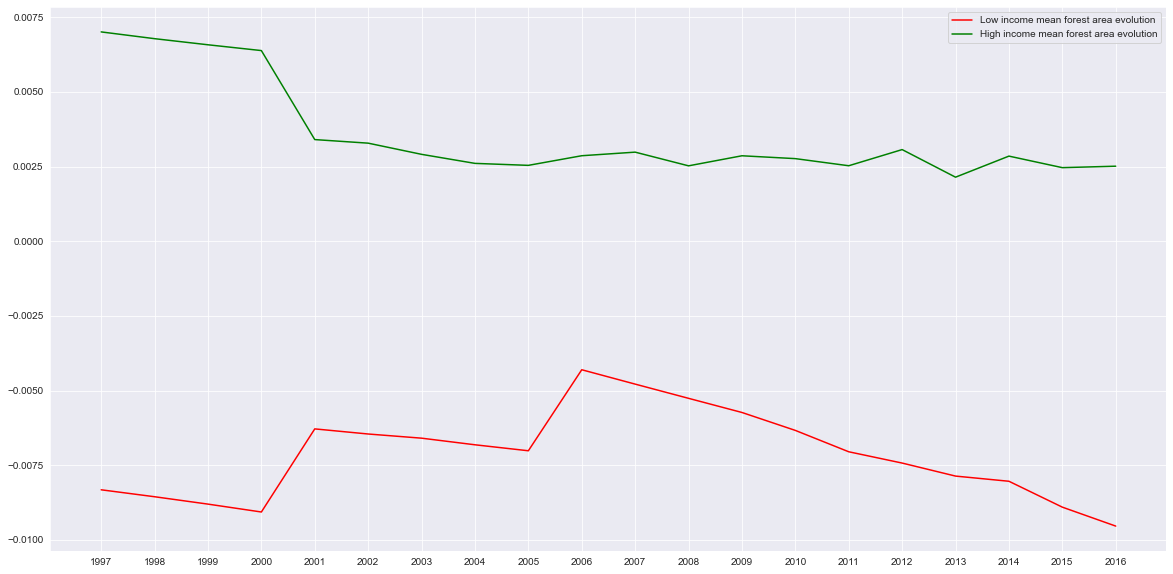

In [103]:
# Average evolution for each group of countries
plt.figure(figsize=(20,10))
plt.plot(df_evol_forests_low_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean(), color='r', label="Low income mean forest area evolution")
plt.plot(df_evol_forests_high_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean(), color='g', label="High income mean forest area evolution")
plt.legend()

- **High income forest area evolution:** We see that evolution of forest area in high income countries is always above 0 (which means forests are expanding) and seems to be pretty stable since 2001.
- **Low income forest area evolution:** We see that evolution of forest area in low income countries is always below 0 (which means forests area is shrinking) and seems to only get worse since 2006.

#### CO2

In [104]:
# Creating separate dataframes for high and low income countries
df_evol_co2_low_income = df_cluster_based_evol_co2[df_cluster_based_evol_co2["IncomeGroup"]== "Low income"]
df_evol_co2_high_income = df_cluster_based_evol_co2[df_cluster_based_evol_co2["IncomeGroup"]== "High income"]

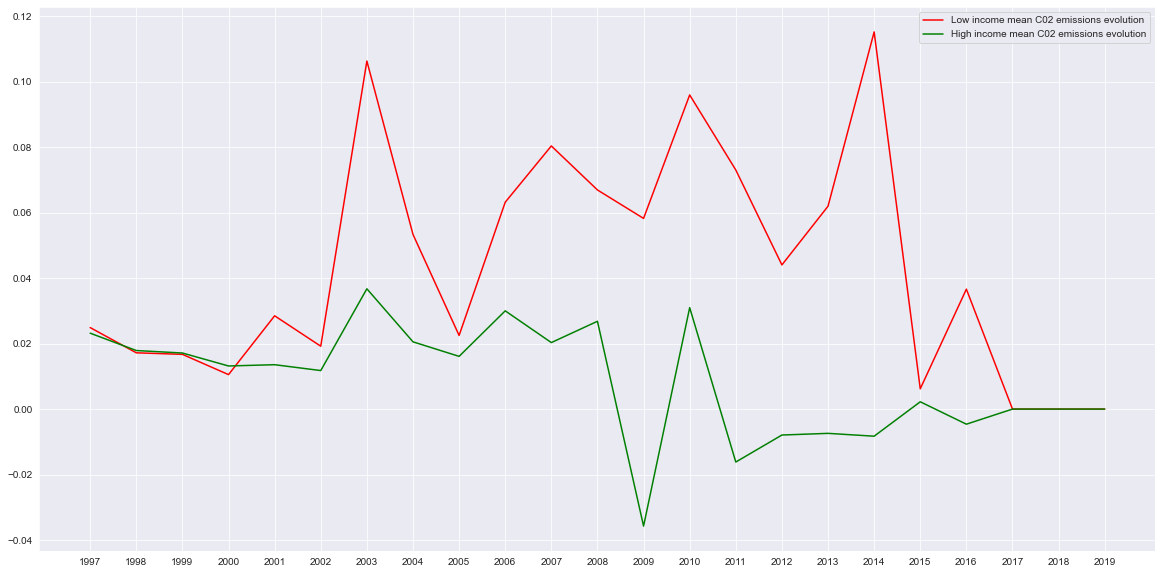

In [105]:
# Average evolution for each group of countries
plt.figure(figsize=(20,10))
plt.plot(df_evol_co2_low_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean(), color='r', label="Low income mean C02 emissions evolution")
plt.plot(df_evol_co2_high_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean(), color='g', label="High income mean C02 emissions evolution")
plt.legend()

### Governance Indicators

#### Political stability

In [106]:
# Creating separate dataframes for high and low income countries
df_evol_political_stability_low_income = df_cluster_based_evol_political_stability[df_cluster_based_evol_political_stability["IncomeGroup"]== "Low income"]
df_evol_political_stability_high_income = df_cluster_based_evol_political_stability[df_cluster_based_evol_political_stability["IncomeGroup"]== "High income"]

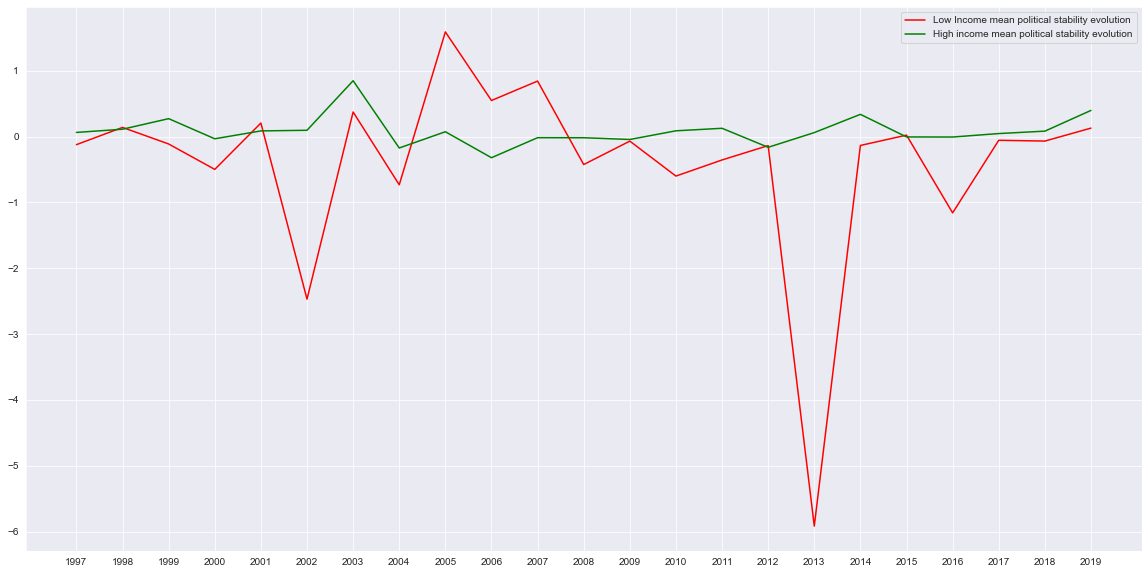

In [107]:
# Average evolution for each group of countries
plt.figure(figsize=(20,10))
plt.plot(df_evol_political_stability_low_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean(), color='r', label="Low Income mean political stability evolution")
plt.plot(df_evol_political_stability_high_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean(), color='g', label="High income mean political stability evolution")
plt.legend()

- **High income political stability evolution:** Seems to be pretty stable staying around 0.
- **Low income political stability evolution:** Seems to be fluctuating much more with a minimum in 2013 (why?).

#### Voice and accountability

In [108]:
# Creating separate dataframes for high and low income countries
df_evol_voice_low_income = df_cluster_based_evol_voice[df_cluster_based_evol_voice["IncomeGroup"]== "Low income"]
df_evol_voice_high_income = df_cluster_based_evol_voice[df_cluster_based_evol_voice["IncomeGroup"]== "High income"]

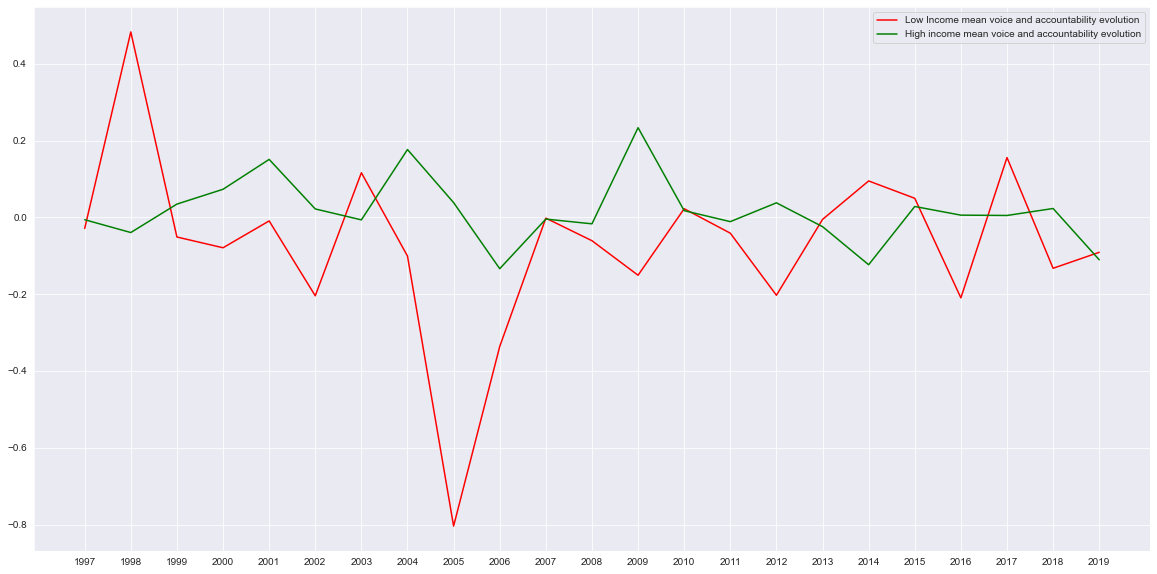

In [109]:
# Average evolution for each group of countries
plt.figure(figsize=(20,10))
plt.plot(df_evol_voice_low_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean(), color='r', label="Low Income mean voice and accountability evolution")
plt.plot(df_evol_voice_high_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean(), color='g', label="High income mean voice and accountability evolution")
plt.legend()

## Correlation between average evolutions based on clusters

We now look at two pairs of correlations between average evolutions of env variables and governance indicators for both clusters of countries to see of we can observe any differences and try to come up with conclusions.

#### Forests and political stability:

In [110]:
correlation_high_income_mean = df_evol_forests_high_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean().corr(df_evol_political_stability_high_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean())
correlation_low_income_mean = df_evol_forests_low_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean().corr(df_evol_political_stability_low_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean())
print("Correlation between average forest evolution and average political stability evolution:")
print("- for high income countries is: " + str(correlation_high_income_mean))
print("- for low income countries is: " + str(correlation_low_income_mean))

Correlation between average forest evolution and average political stability evolution:
- for high income countries is: 0.09105028424184024
- for low income countries is: 0.20902190421758896


We observe that correlation between forest area evolution and political stability on average is **much higher** for lower income countries, which might be due to the fact that political stability in higher income countries as well as forest area evolution are pretty stable.

#### C02 and voice & accountability:

In [111]:
correlation_high_income_mean_2 = df_evol_co2_high_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean().corr(df_evol_voice_high_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean())
correlation_low_income_mean_2 = df_evol_co2_low_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean().corr(df_evol_voice_low_income.drop(columns=["Country Code","Region", "IncomeGroup"]).mean())
print("Correlation between average co2 emissions evolution and average voice & accountability evolution:")
print("- for high income countries is: " + str(correlation_high_income_mean_2))
print("- for low income countries is: " + str(correlation_low_income_mean_2))

Correlation between average co2 emissions evolution and average voice & accountability evolution:
- for high income countries is: -0.22640621184968943
- for low income countries is: 0.10824765690940993


Relatively high negative correlation between co2 emissions evolutions and voice and accountability means that more accountability in high income countries leads to lower co2 emissions which makes sense, while it does not seem to make much difference for lower income countries.

# Explanatory Models

After conducting a exploratory analysis on the variables, it is still difficult to determine if the evolution of one political variable influences the evolution of an environmental variable. 

Therefore, in this part we will try to build a regression model that, given the variation of the political variables, tries to predict the variation of the environment variable (for a given year). If it succeeds, then there is a relation. If not, it doesn't seem to be a relation, or we do not have enough data to prove that there is a relation.

To do so, we will stay in the context of a given year, meaning we'll have the following dataset:

- 1 row = 1 country
- columns = political variables + environment variable (for the given year)
- Value in cell = the percentage evolution of the variable on that given year

The model will try to predict the % evolution of CO2 emissions.

## Regression on CO2

In this part, the environment variable is the CO2 emission. We conducted a Linear Regression and a Random Forest on several years. 

***Linear Regression***

- Very bad score on the training set (R2 around 0.03)
- The model cannot predict the evolution of CO2 based on the evolution of politcal factors


***Random Forest***

- Good R2 on the training set (around 0.7)
- But very bad R2 on the testing set (around -0.2)
- The model is overfitting
- The model cannot predict the evolution of CO2 based on the evolution of politcal factors

## Regression on Forest

Here, we want to explain the evolution of the forest variable with the evolution of political factors. 

***Linear Regression***

- R2 on training test of 0.02
- The model cannot predict correctly

***Random Forest***

- R2 on the training set of 0.74
- R2 on the testing set of -0.7
- Bad generalization
- The model cannot predict

## Regression on Fishing

Here, we want to explain the evolution of the fishing variable with the evolution of political stability factors. 

***Linear Regression***

 - R2 of 0.004
 - Cannot predict

***Random Forest***

 - R2 on the training set of 0.64
 - R2 on the testing set of -1.1
 - Cannot predict

## Conclusion

With the data that we have, we are not able to identify a relation between the evolution of political stability factors and the evolution of environmental variables. 

# Summary

In this report we considered six political indicators and three environmental variables:

| Political Indicators | Environmental Variables |
| -------------------- | ----------------------- |
| Control of Corruption: Estimate | Capture fisheries production (metric tons) |
| Government Effectiveness: Estimate | Forest area (% of land area) |
| Political Stability and Absence of Violence/Terrorism: Estimate | CO2 emissions |
| Regulatory Quality: Estimate | |
| Rule of Law: Estimate | |
| Voice and Accountability: Estimate | |

Our work rests on five main pillars:

- Static Univariate analysis
- Static Bivariate Analysis
- Dynamic Bivariate Analysis
- Cluster-based analysis on evolution data
- Explanatory models

In the static univariate analysis, we explored each variable individually and performed a PCA on the political indicators. We found that the first component explained approx. $86$% of the variance, hinting that the political indicators are highly correlated.

In the static bivariate analysis, we explored how all pairs constituted of one political indicator and one environmental variable behave. We found that the political indicators are highly correlated between them, as are the environmental variables between them. However, no political indicator is noticeably highly correlated with any of the environmental variables.

Then in the dynamic bivariate analysis and in the cluster-based analysis, we investigated the evolutions of the political indicators and how they influence the evolutions of the environmental variables. Also, we incorporated information about economic development and income level for each country. The correlation with an environmental variable may increase depending on the income level: higher for low-level income countries, which could be further explored.

Finally, we attempted to build predictive models of the evolution of each one of the environmental variables, using Linear Regression and RandomForest models. Unfortunately, they all delivered surprisingly low scores with weak metrics.

# Appendix

## Examples of analysis on individual countries

### China

In [112]:
china = data[data['Country Name'] == 'China'].drop_duplicates()

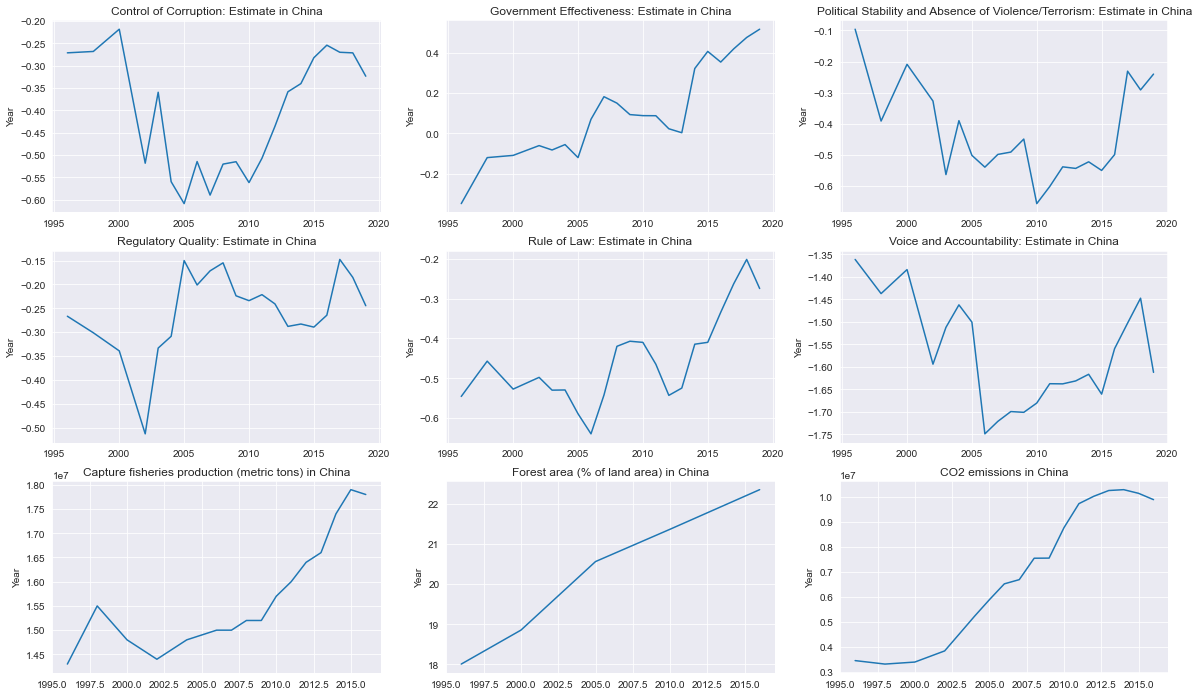

In [113]:
vars = ['Control of Corruption: Estimate', 'Government Effectiveness: Estimate',
        'Political Stability and Absence of Violence/Terrorism: Estimate',
        'Regulatory Quality: Estimate', 'Rule of Law: Estimate',
        'Voice and Accountability: Estimate', 'Capture fisheries production (metric tons)',
        'Forest area (% of land area)', 'CO2 emissions']

fig, ax = plt.subplots(3,3, figsize=(20,12))
for i, var in enumerate(vars):
  row = i//3
  col = i%3
  ax[row, col].plot(china['Year'], china[var])
  ax[row, col].set_title(var + ' in China')
  ax[row, col].set_ylabel("Year")

### France

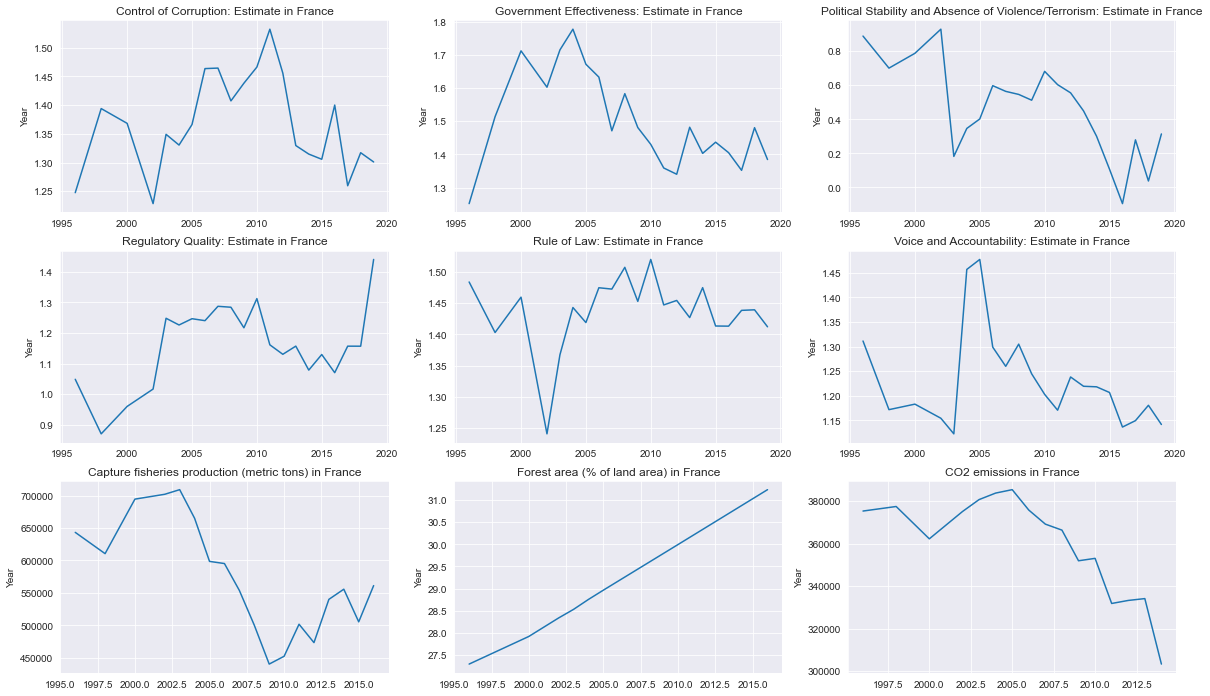

In [114]:
france = data[data['Country Name'] == 'France'].drop_duplicates()

vars = ['Control of Corruption: Estimate', 'Government Effectiveness: Estimate',
        'Political Stability and Absence of Violence/Terrorism: Estimate',
        'Regulatory Quality: Estimate', 'Rule of Law: Estimate',
        'Voice and Accountability: Estimate', 'Capture fisheries production (metric tons)',
        'Forest area (% of land area)', 'CO2 emissions']

fig, ax = plt.subplots(3,3, figsize=(20,12))
for i, var in enumerate(vars):
  row = i//3
  col = i%3
  ax[row, col].plot(france['Year'], france[var])
  ax[row, col].set_title(var + ' in France')
  ax[row, col].set_ylabel("Year")

### Brazil

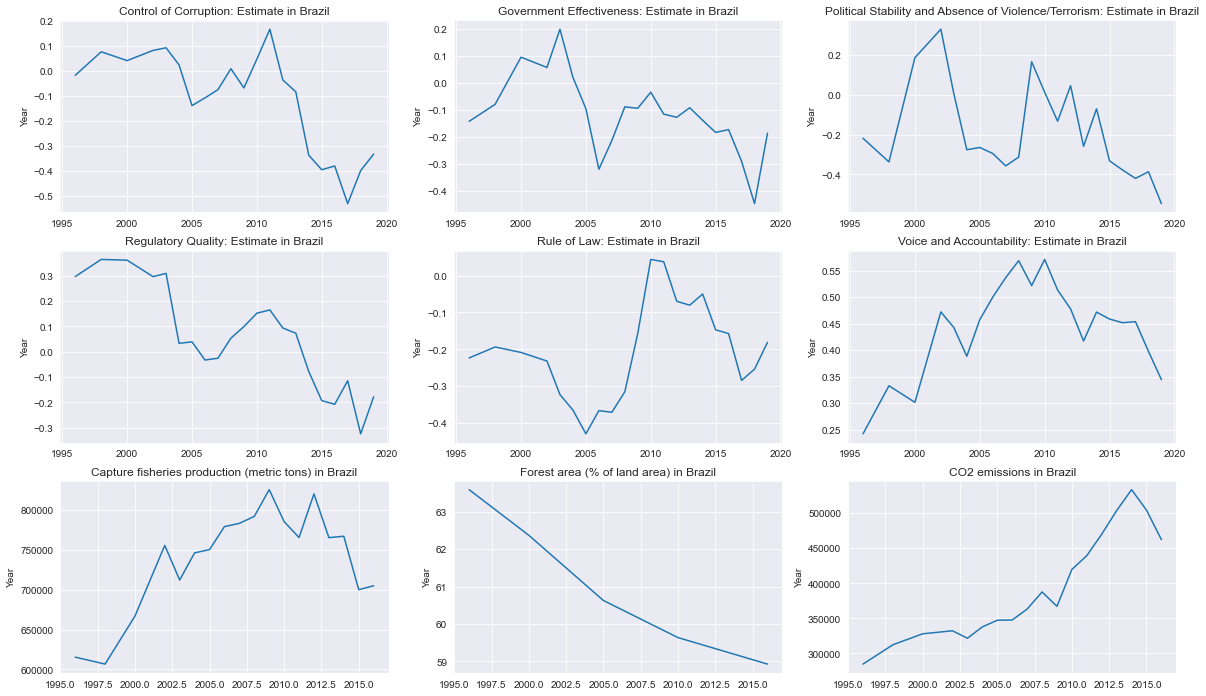

In [115]:
brazil = data[data['Country Name'] == 'Brazil'].drop_duplicates()

vars = ['Control of Corruption: Estimate', 'Government Effectiveness: Estimate',
        'Political Stability and Absence of Violence/Terrorism: Estimate',
        'Regulatory Quality: Estimate', 'Rule of Law: Estimate',
        'Voice and Accountability: Estimate', 'Capture fisheries production (metric tons)',
        'Forest area (% of land area)', 'CO2 emissions']

fig, ax = plt.subplots(3,3, figsize=(20,12))
for i, var in enumerate(vars):
  row = i//3
  col = i%3
  ax[row, col].plot(brazil['Year'], brazil[var])
  ax[row, col].set_title(var + ' in Brazil')
  ax[row, col].set_ylabel("Year")

### South Africa

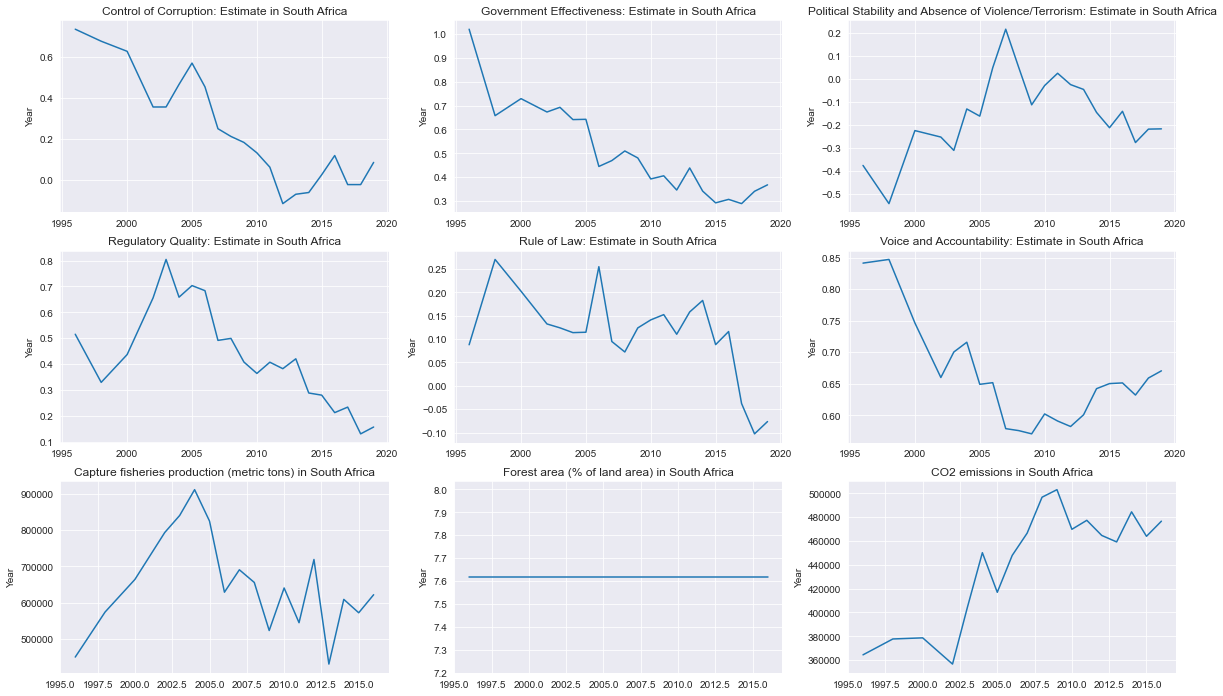

In [116]:
RHSA = data[data['Country Name'] == 'South Africa'].drop_duplicates()

vars = ['Control of Corruption: Estimate', 'Government Effectiveness: Estimate',
        'Political Stability and Absence of Violence/Terrorism: Estimate',
        'Regulatory Quality: Estimate', 'Rule of Law: Estimate',
        'Voice and Accountability: Estimate', 'Capture fisheries production (metric tons)',
        'Forest area (% of land area)', 'CO2 emissions']

fig, ax = plt.subplots(3,3, figsize=(20,12))
for i, var in enumerate(vars):
  row = i//3
  col = i%3
  ax[row, col].plot(RHSA['Year'], RHSA[var])
  ax[row, col].set_title(var + ' in South Africa')
  ax[row, col].set_ylabel("Year")